In [222]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

#file = 'Tg.CSV'
file = 'tan_delta_study.CSV'

df = pd.read_csv(file)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 7 columns):
folderID             383 non-null int64
matrix               383 non-null object
filler               383 non-null object
filler percentage    383 non-null float64
Tg                   383 non-null float64
tan delta peak       383 non-null float64
half width           383 non-null float64
dtypes: float64(4), int64(1), object(2)
memory usage: 21.0+ KB


In [223]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

#one hot matrix, filler
categorical_features = df[['matrix', 'filler']]
enc = OneHotEncoder(sparse=False)
cf_oneHot = enc.fit_transform(categorical_features)
print(enc.categories_)
print(enc.get_feature_names())
print(cf_oneHot)
print(type(cf_oneHot))
#turn the nparray into a dataframe
df_categorical = pd.DataFrame(data=cf_oneHot, columns=enc.get_feature_names())
#add this dataframe to the original dataframe
df_new = pd.concat([df, df_categorical], axis=1)
#df_new.to_csv('transformed_data.csv')


[array(['DGEBA', 'EPDM', 'Ethylene vinyl acetate rubber', 'FPEOF', 'PBAT',
       'PC', 'PC-SAN', 'PLA', 'PMMA', 'PP', 'PVC',
       'Poly(2-hydroxyethyl acrylate)', 'SAN', 'SC-15 epoxy',
       'bisphenol A PC', 'bisphenol-A phthalonitrile', 'epoxy',
       'epoxy (Epon 815)', 'epoxy (Epon 862', 'epoxy (LY564)',
       'natural rubber', 'phenoxy', 'poly(butylene terephthalate)',
       'poly(vinyl alcohol)', 'poly(vinyl butyral)', 'polyamide',
       'polyamide-6', 'polyamide-6,6', 'polybenzimidazole',
       'polybutylene succinate', 'polyimide', 'polyurethane',
       'rigid PU foam', 'styrene butadiene rubber',
       'waterborne UV-curable polyurethane'], dtype=object), array(['CLO30B', 'CNW', 'CaCO3', 'MMA-MWCNT', 'MWCNT', 'NAN', 'Na-MMT',
       'Na-montmorillonite', 'PANI-organoclay', 'PDMS-clay',
       'PMMA-g-MWCNT', 'PMMA-g-expandable graphite', 'PMMA-g-silica',
       'SEP', 'SOMM100', 'SOMMEE', 'SWCNT', 'TiO2', 'ZrO2',
       'butanol cellulose nanowhiskers', 'cellulose n

In [224]:
#create X and y, begin modelling
#print(df_new.info())
#print(df_new.columns)
#X = df_new[['RPM parameter 1', 'processing energy', 'Wpf/Wff', 'x1_PMMA', 'x1_PS', 'x2_SiO2', 'x3_Cl', 'x3_N', 'x3_O' ]].values
df_X = pd.concat([df[['filler percentage']], df_categorical], axis=1)
X = df_X.values
y = df_new['Tg'].values


In [225]:
from sklearn.metrics import mean_absolute_error
#Linear regression
reg = LinearRegression()
reg.fit(X, y)
R_2 = reg.score(X, y)
print('linear regression r2: ', R_2)
y_pred = reg.predict(X)
#print(list(zip(y,y_pred)))
mean_absolute_error(y, y_pred)

linear regression r2:  0.9365423853039283


12.847281140457733

In [226]:
# normalization
from sklearn.preprocessing import normalize
X_normalized = normalize(X, norm='l2')

#Linear regression
reg = LinearRegression()
reg.fit(X_normalized, y)
R_2 = reg.score(X_normalized, y)
print('linear regression with normalization r2: ', R_2)
y_pred = reg.predict(X_normalized)
#print(list(zip(y,y_pred)))
mean_absolute_error(y, y_pred)

linear regression with normalization r2:  0.5143742136434755


37.42360625213632

In [228]:
# feature standardization
from sklearn.preprocessing import scale
df["standardized_filler_percentage"] = scale(df[['filler percentage']])
df_X_stand = pd.concat([df["standardized_filler_percentage"], df_categorical], axis=1)
X_standardized = df_X_stand.values

#Linear regression
reg = LinearRegression()
reg.fit(X_standardized, y)
R_2 = reg.score(X_standardized, y)
print('linear regression with standardization r2: ', R_2)
y_pred = reg.predict(X_standardized)
#print(list(zip(y,y_pred)))
mean_absolute_error(y, y_pred)

linear regression with standardization r2:  0.936542272308949


12.84768864151436

In [12]:
#loo for linear regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import mean_squared_error

loo = LeaveOneOut()
lr = LinearRegression()
scores_lr = cross_val_score(lr, X, y, cv=loo.split(X), 
                             scoring='neg_mean_absolute_error')
print('average mean absolute error:', np.mean(-scores_lr))
print('average y true values:', np.mean(y))


average mean absolute error: 51771523727.59586
average y true values: 107.94295911331595


In [15]:
scores_lr

array([-1.58271933e+00, -2.01366443e+00, -3.84082031e+00, -9.27734375e-02,
       -3.53150970e+00, -2.14681020e+00, -2.01419294e-01, -6.80411200e-01,
       -2.08985934e+00, -7.90039062e-01, -2.43541418e+01, -1.36452344e+01,
       -3.91847656e+00, -1.20621484e+01, -7.21785156e+00, -9.81952623e+00,
       -1.46392489e+01, -2.32070703e+01, -1.10005560e+01, -1.56764626e+01,
       -1.78615377e+00, -1.00674162e+01, -3.39193808e+01, -3.63243331e+01,
       -3.69007734e+01, -3.79125003e+01, -3.79111724e+01, -4.54827052e+01,
       -4.42996991e+01, -4.25234261e+01, -3.15298479e+01, -3.15718888e+01,
       -1.64238750e+00, -1.11228838e+00, -6.13653025e-01, -3.10791001e+00,
       -6.04748111e+00, -3.85433043e+00, -3.37349393e+00, -1.30141672e+01,
       -5.82200787e-01, -4.70399110e+00, -5.87268401e+00, -6.61503846e+00,
       -3.63984307e+00, -2.02397539e+00, -3.17589397e+00, -6.95960120e+00,
       -1.98345630e+00, -1.58133596e+01, -2.07499104e+01, -2.31681054e+01,
       -1.13624308e+01, -

In [14]:
ridge = Ridge(alpha=1e-11)
ridge.fit(X, y)
y_pred = ridge.predict(X)
mean_absolute_error(y, y_pred)

12.847207491442713

In [13]:
#linear regression was overfitting, try ridge regression
from sklearn.linear_model import Ridge
ridge = Ridge()
scores_ridge = cross_val_score(ridge, X, y, cv=loo.split(X), 
                                 scoring='neg_mean_absolute_error')
print('average mean absolute error:', np.mean(-scores_ridge))

average mean absolute error: 19.32339005536805


In [17]:
for alpha in [0.00000000001,0.0000000001,0.000000001,0.00000001]:
    ridge = Ridge(alpha=alpha)
    scores_ridge = cross_val_score(ridge, X, y, cv=loo.split(X), 
                                 scoring='neg_mean_absolute_error')
    print(alpha, 'average mean absolute error:', np.mean(-scores_ridge))
#best alpha=1e-11

1e-11 average mean absolute error: 14.760499205698373
1e-10 average mean absolute error: 14.760557064846966
1e-09 average mean absolute error: 14.76056314934124
1e-08 average mean absolute error: 14.760563527929113


In [18]:
ridge = Ridge(alpha=1e-11)
scores_ridge = cross_val_score(ridge, X, y, cv=loo.split(X), 
                                 scoring='neg_mean_absolute_error')
print('average mean absolute error:', np.mean(-scores_ridge))

average mean absolute error: 14.760499205698373


In [127]:
#decision tree
from sklearn import tree

errors = np.zeros((8, 3))
for i in range(18, 26):
    for j in range(1, 4):
        dt = tree.DecisionTreeRegressor(max_depth=i, min_samples_leaf=j)
        scores_dt = cross_val_score(dt, X, y, cv=loo.split(X),
                           scoring='neg_mean_absolute_error')
        print(i, j, '  leave one out mean_absolute_error: ', np.mean(-scores_dt))
        errors[i-18, j-1] = np.mean(-scores_dt)

18 1   leave one out mean_absolute_error:  14.546011546097157
18 2   leave one out mean_absolute_error:  14.61115892674062
18 3   leave one out mean_absolute_error:  17.771247119244507
19 1   leave one out mean_absolute_error:  15.675573184002655
19 2   leave one out mean_absolute_error:  15.878384027241497
19 3   leave one out mean_absolute_error:  16.721311738597596
20 1   leave one out mean_absolute_error:  15.28137467290766
20 2   leave one out mean_absolute_error:  14.869892958247693
20 3   leave one out mean_absolute_error:  16.913854593506606
21 1   leave one out mean_absolute_error:  14.897359192932575
21 2   leave one out mean_absolute_error:  14.932957308520898
21 3   leave one out mean_absolute_error:  17.251764136610955
22 1   leave one out mean_absolute_error:  14.335511560196428
22 2   leave one out mean_absolute_error:  14.08246351240431
22 3   leave one out mean_absolute_error:  17.705112824327344
23 1   leave one out mean_absolute_error:  14.240075161933328
23 2   leav

In [128]:
np.amin(errors)

13.502637126675351

In [21]:
dt = tree.DecisionTreeRegressor()
#dt.fit(X,y)
#dt.score(X,y)
scores_dt = cross_val_score(dt, X, y, cv=loo.split(X),
                           scoring='neg_mean_absolute_error')
print('  leave one out mean_absolute_error: ', np.mean(-scores_dt))

  leave one out mean_absolute_error:  13.929968826529903


In [255]:
#best max_depth=33, min_samples_leaf=1
from sklearn import tree
dt = tree.DecisionTreeRegressor(min_samples_leaf = 1, max_depth=33)
scores_dt = cross_val_score(dt, X_standardized, y, cv=loo.split(X_standardized),
                           scoring='neg_mean_absolute_error')
print('  leave one out mean_absolute_error: ', np.mean(-scores_dt))

  leave one out mean_absolute_error:  13.610591989227899


In [313]:
#decision tree
from sklearn import tree

errors = np.zeros((10, 3))
for i in range(25, 35):
    for j in range(1, 4):
        dt = tree.DecisionTreeRegressor(max_depth=i, min_samples_leaf=j)
        scores_dt = cross_val_score(dt, X_standardized, y, cv=loo.split(X_standardized),
                           scoring='neg_mean_absolute_error')
        print(i, j, '  leave one out mean_absolute_error: ', np.mean(-scores_dt))
        errors[i-25, j-1] = np.mean(-scores_dt)

25 1   leave one out mean_absolute_error:  13.98536423019367
25 2   leave one out mean_absolute_error:  13.499281219948594
25 3   leave one out mean_absolute_error:  17.360015419370757
26 1   leave one out mean_absolute_error:  13.742813387466668
26 2   leave one out mean_absolute_error:  13.861030536411475
26 3   leave one out mean_absolute_error:  17.408277050729463
27 1   leave one out mean_absolute_error:  13.868472796619814
27 2   leave one out mean_absolute_error:  13.954485110703207
27 3   leave one out mean_absolute_error:  17.36748934872577
28 1   leave one out mean_absolute_error:  13.562857195093867
28 2   leave one out mean_absolute_error:  13.53967115384931
28 3   leave one out mean_absolute_error:  17.343750734191392
29 1   leave one out mean_absolute_error:  13.580553097622156
29 2   leave one out mean_absolute_error:  13.588344103227032
29 3   leave one out mean_absolute_error:  17.32593830808173
30 1   leave one out mean_absolute_error:  13.732581995966369
30 2   leave

In [314]:
np.amin(errors)

13.466672892957853

In [237]:
dt = tree.DecisionTreeRegressor()
dt.fit(X_standardized,y)
print(dt.score(X_standardized,y))

#tree.export_graphviz(dt,
#    out_file='tree.dot') 

#print(dt.feature_importances_)

print(dt.tree_.max_depth)
y_pred = dt.predict(X_standardized)
print(mean_absolute_error(y, y_pred))

0.9802590774743261
34
5.380713231458411


In [22]:
dt = tree.DecisionTreeRegressor()
dt.fit(X,y)
print(dt.score(X,y))

#tree.export_graphviz(dt,
#    out_file='tree.dot') 

print(dt.feature_importances_)

print(dt.tree_.max_depth)

0.9802590774743261
[1.59710987e-02 1.57550379e-03 0.00000000e+00 2.02748356e-02
 3.24109108e-02 2.22399065e-03 0.00000000e+00 0.00000000e+00
 2.31767863e-03 3.47703579e-02 3.19896733e-05 1.08751083e-03
 4.55459388e-06 4.11413858e-04 0.00000000e+00 6.85394881e-03
 9.31911513e-02 3.53534012e-03 2.40871893e-05 4.82709275e-03
 1.47620518e-04 2.11898657e-02 1.21362424e-04 5.99824608e-04
 6.74356776e-03 2.01993625e-02 1.42757430e-02 1.01112362e-04
 1.20080870e-05 1.55335232e-01 2.18890648e-02 3.68562260e-01
 4.89561384e-02 8.68490120e-03 5.00342151e-03 4.12636400e-05
 1.33999010e-05 1.51127365e-08 3.86390701e-06 6.16407371e-04
 2.17969060e-04 4.17364391e-06 4.94208492e-04 2.74452996e-04
 3.29044987e-02 6.62068455e-07 0.00000000e+00 0.00000000e+00
 5.82673430e-04 7.06437677e-07 7.63200144e-05 3.37449339e-08
 8.59381770e-06 1.43870003e-06 1.19569901e-06 1.10324239e-04
 0.00000000e+00 0.00000000e+00 3.32077339e-06 2.45689044e-03
 8.45636237e-03 2.53646476e-03 3.34043743e-04 2.64418658e-03
 3.27

In [23]:
import sklearn
help(sklearn.tree._tree.Tree)

Help on class Tree in module sklearn.tree._tree:

class Tree(builtins.object)
 |  Array-based representation of a binary decision tree.
 |  
 |  The binary tree is represented as a number of parallel arrays. The i-th
 |  element of each array holds information about the node `i`. Node 0 is the
 |  tree's root. You can find a detailed description of all arrays in
 |  `_tree.pxd`. NOTE: Some of the arrays only apply to either leaves or split
 |  nodes, resp. In this case the values of nodes of the other type are
 |  arbitrary!
 |  
 |  Attributes
 |  ----------
 |  node_count : int
 |      The number of nodes (internal nodes + leaves) in the tree.
 |  
 |  capacity : int
 |      The current capacity (i.e., size) of the arrays, which is at least as
 |      great as `node_count`.
 |  
 |  max_depth : int
 |      The maximal depth of the tree.
 |  
 |  children_left : array of int, shape [node_count]
 |      children_left[i] holds the node id of the left child of node i.
 |      For leaves,

In [24]:
errors = {}
for i in range(1, 10):
    dt = tree.DecisionTreeRegressor(min_samples_leaf=i)
    scores_dt = cross_val_score(dt, X, y, cv=loo.split(X),
                        scoring='neg_mean_absolute_error')
    print(i, '  leave one out mean_absolute_error: ', np.mean(-scores_dt))
    errors[i] = np.mean(-scores_dt)



1   leave one out mean_absolute_error:  13.832311941281862
2   leave one out mean_absolute_error:  13.724583323843094
3   leave one out mean_absolute_error:  17.226587393597708
4   leave one out mean_absolute_error:  22.458241036908134
5   leave one out mean_absolute_error:  27.85842330432869
6   leave one out mean_absolute_error:  30.98143012820129
7   leave one out mean_absolute_error:  32.797690326931324
8   leave one out mean_absolute_error:  37.685839961888696
9   leave one out mean_absolute_error:  39.70526610785209


In [129]:
#best hyperparameter: min_samples_leaf = 1, max_depth = 24
dt = tree.DecisionTreeRegressor(min_samples_leaf = 1, max_depth=24)
dt.fit(X,y)
print(dt.score(X,y))

tree.export_graphviz(dt,
    out_file='tree.dot') 

print(dt.feature_importances_)

print(dt.tree_.max_depth)

y_pred = dt.predict(X)
mean_absolute_error(y, y_pred)

0.9720199169624578
[1.35309589e-02 1.58885827e-03 0.00000000e+00 2.04466918e-02
 3.26856363e-02 2.24284193e-03 0.00000000e+00 0.00000000e+00
 2.33732404e-03 3.50650829e-02 0.00000000e+00 9.66397628e-04
 2.81625766e-06 0.00000000e+00 0.00000000e+00 6.91204514e-03
 9.39810702e-02 0.00000000e+00 0.00000000e+00 4.86800878e-03
 0.00000000e+00 2.13694779e-02 0.00000000e+00 6.04908918e-04
 6.80072846e-03 2.03705789e-02 1.43967489e-02 1.01969424e-04
 1.38868139e-05 1.56651904e-01 2.20746037e-02 3.71686315e-01
 4.93711067e-02 8.75851727e-03 5.04583215e-03 4.16134041e-05
 1.35134830e-05 0.00000000e+00 0.00000000e+00 6.21632242e-04
 2.87667360e-03 0.00000000e+00 4.98397566e-04 2.76779350e-04
 3.31834081e-02 6.67680365e-07 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 7.69669280e-05 0.00000000e+00
 0.00000000e+00 1.45089493e-06 1.20583414e-06 1.11259383e-04
 0.00000000e+00 0.00000000e+00 3.34892135e-06 2.47771585e-03
 8.51884588e-03 2.56918586e-03 2.45759127e-04 2.66659957e-03
 3.30

7.199385580736565

c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


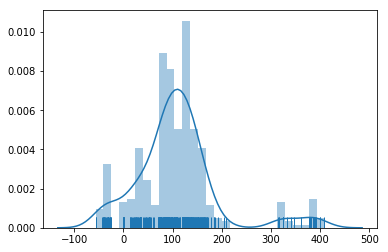

In [26]:
sns.distplot(y, rug=True)

In [356]:
import pickle
pickle_in = open("filler_vectors.pickle","rb")
filler_vectors = pickle.load(pickle_in)
pickle_in.close()
filler_vectors

{'MWCNT': array([ 0.00860113, -1.03260005,  0.64588594,  0.47779787,  0.24385948,
        -0.06062395, -0.68371701,  0.2689622 , -0.22832523, -0.153621  ,
        -0.66910374, -0.30577415, -0.89125711,  0.1151796 ,  0.45576879,
        -0.14298658, -0.34224951, -0.33557743,  0.15413769, -0.72306806,
         0.20277208, -0.23277667, -0.07035992, -0.46789309, -0.21163905,
         0.20147236, -0.27588403,  0.40615338, -0.18357557, -0.41297618,
        -0.13048166, -0.93967432, -0.15458161, -0.28475532,  0.48509288,
         0.98409057,  0.93000638,  0.47202432, -0.17727551, -0.02319303,
        -1.60362697, -0.03539341, -0.10192662,  0.48451814, -0.16315909,
         0.07069767, -0.31977886,  0.5023858 ,  0.77217191, -0.34890571,
         0.11122582,  0.03634916,  1.03076053,  0.18434379, -0.92971528,
        -0.51226813,  0.49450997, -0.18413666, -0.46274212,  0.19861196,
        -0.47976661,  0.68759608,  0.87635547, -0.51680321,  0.14155737,
        -0.34496355,  0.17161381,  1.08704

In [357]:
pickle_in = open("matrix_vectors.pickle","rb")
matrix_vectors = pickle.load(pickle_in)
pickle_in.close()
matrix_vectors

{'bisphenol A PC': array([ 0.09760512, -0.49285525,  0.59907046,  0.4076535 ,  0.13687227,
         0.12928449,  0.20651953,  0.30990215, -0.0189062 , -0.10556737,
        -0.2214813 ,  0.31907384, -0.50495017, -0.20957507,  0.46442664,
         0.15363452, -0.1887982 , -0.30010779, -0.01194632, -0.28905727,
         0.18882926,  0.14452246, -0.09500518, -0.43336631,  0.00659299,
         0.01451863,  0.12846256,  0.74215376,  0.16430452, -0.10531601,
         0.25095334, -0.42087046, -0.10003082, -0.27160406,  0.57401547,
         0.17363901,  0.55069061,  0.34632709, -0.24522626,  0.09868017,
        -0.51648107, -0.0317466 ,  0.09448896,  0.27004605, -0.09130323,
        -0.04755371,  0.04575628,  0.48298648,  0.46183506, -0.44878054,
         0.20680645,  0.22214416,  0.51773886,  0.06355288, -0.22401156,
        -0.30891807,  0.16428882, -0.12187406, -0.25870324,  0.2862826 ,
        -0.10383948,  0.21391399,  0.33919187, -0.10157377, -0.03578883,
        -0.60724143, -0.05469615,

In [148]:
df_embedding

,matrix,filler,filler percentage,matrix_embedding_0,matrix_embedding_1,matrix_embedding_2,matrix_embedding_3,matrix_embedding_4,matrix_embedding_5,matrix_embedding_6,...,filler_embedding_90,filler_embedding_91,filler_embedding_92,filler_embedding_93,filler_embedding_94,filler_embedding_95,filler_embedding_96,filler_embedding_97,filler_embedding_98,filler_embedding_99
0,bisphenol A PC,MWCNT,10.00,0.097605,-0.492855,0.599070,0.407654,0.136872,0.129284,0.206520,...,0.314092,-0.366418,0.259528,1.043176,-0.953322,0.005673,0.897779,-0.090142,-0.081130,-0.299452
1,bisphenol A PC,MWCNT,2.00,0.097605,-0.492855,0.599070,0.407654,0.136872,0.129284,0.206520,...,0.314092,-0.366418,0.259528,1.043176,-0.953322,0.005673,0.897779,-0.090142,-0.081130,-0.299452
2,bisphenol A PC,MWCNT,5.00,0.097605,-0.492855,0.599070,0.407654,0.136872,0.129284,0.206520,...,0.314092,-0.366418,0.259528,1.043176,-0.953322,0.005673,0.897779,-0.090142,-0.081130,-0.299452
3,bisphenol A PC,MWCNT,5.00,0.097605,-0.492855,0.599070,0.407654,0.136872,0.129284,0.206520,...,0.314092,-0.366418,0.259528,1.043176,-0.953322,0.005673,0.897779,-0.090142,-0.081130,-0.299452
4,bisphenol A PC,MWCNT,0.00,0.097605,-0.492855,0.599070,0.407654,0.136872,0.129284,0.206520,...,0.314092,-0.366418,0.259528,1.043176,-0.953322,0.005673,0.897779,-0.090142,-0.081130,-0.299452
5,EPDM,PANI-organoclay,10.00,-0.233308,-0.633237,0.650954,0.397512,0.207540,-0.022603,0.017320,...,0.073797,-0.094366,0.240834,0.245041,-0.393199,0.077739,0.502241,-0.057964,0.071333,-0.049761
6,EPDM,PANI-organoclay,20.00,-0.233308,-0.633237,0.650954,0.397512,0.207540,-0.022603,0.017320,...,0.073797,-0.094366,0.240834,0.245041,-0.393199,0.077739,0.502241,-0.057964,0.071333,-0.049761
7,EPDM,PANI-organoclay,30.00,-0.233308,-0.633237,0.650954,0.397512,0.207540,-0.022603,0.017320,...,0.073797,-0.094366,0.240834,0.245041,-0.393199,0.077739,0.502241,-0.057964,0.071333,-0.049761
8,EPDM,PANI-organoclay,40.00,-0.233308,-0.633237,0.650954,0.397512,0.207540,-0.022603,0.017320,...,0.073797,-0.094366,0.240834,0.245041,-0.393199,0.077739,0.502241,-0.057964,0.071333,-0.049761
9,EPDM,PANI-organoclay,0.00,-0.233308,-0.633237,0.650954,0.397512,0.207540,-0.022603,0.017320,...,0.073797,-0.094366,0.240834,0.245041,-0.393199,0.077739,0.502241,-0.057964,0.071333,-0.049761


In [358]:
df_embedding = pd.DataFrame(data=df[['matrix','filler','filler percentage']], copy=True)

df_matrix_embedding = pd.DataFrame(data=matrix_vectors)
df_matrix_embedding = df_matrix_embedding.T

df_filler_embedding = pd.DataFrame(data=filler_vectors)
df_filler_embedding = df_filler_embedding.T

df_embedding = pd.merge(left=df_embedding, right=df_matrix_embedding, left_on='matrix', 
                        right_index=True, how='left', validate='many_to_one')
df_embedding = df_embedding.rename(columns= lambda name: 'matrix_embedding_'+str(name) if isinstance(name, int) else name)

df_embedding = pd.merge(left=df_embedding, right=df_filler_embedding, left_on='filler',
                       right_index=True, how='left', validate='many_to_one')
df_embedding = df_embedding.rename(columns= lambda name: 'filler_embedding_'+str(name) if isinstance(name, int) else name)

#check the correctness of df_embedding
compare_df = []
compare_matrix_eb = []
compare_filler_eb = []
for index, row in df_embedding.iterrows():
    compare_df.append(row['filler percentage']==df.iloc[index]['filler percentage'])
    #print(row['filler percentage'])
    compare_matrix_eb.append(row['matrix_embedding_19']== matrix_vectors[row['matrix']][19])
    #print(row['matrix_embedding_19'])
    compare_filler_eb.append(row['filler_embedding_38']== filler_vectors[row['filler']][38])
    #print(row['filler_embedding_38'])
print(all(compare_df))
print(all(compare_matrix_eb))
print(all(compare_filler_eb))

True
True
True


In [359]:
#create X_embedding
df_embedding_dropped = df_embedding.drop(labels=['matrix', 'filler'], axis='columns')
X_embedding = df_embedding_dropped.values

In [365]:
#Linear regression
reg = LinearRegression()
reg.fit(X_embedding, y)
R_2 = reg.score(X_embedding, y)
print('linear regression r2: ', R_2)
y_pred = reg.predict(X_embedding)
print(list(zip(y,y_pred)))
mean_absolute_error(y, y_pred)

linear regression r2:  0.9215392606917359
[(169.4545455, 168.84118788018094), (167.7575758, 169.0839513656303), (172.0, 168.9929150585869), (169.0, 168.9929150585869), (166.8434903, 169.14464223699287), (-31.562947899999998, -31.019948623185513), (-31.163326799999997, -31.32340297999744), (-32.249276300000005, -31.626857336808456), (-32.6414639, -31.930311693620382), (-29.0, -30.716494266374497), (97.86, 118.8891241323229), (107.22, 118.85877869664299), (121.98, 118.6767060825562), (108.64, 118.85877869664299), (124.92, 118.6767060825562), (92.81061509999999, 84.34130662957655), (71.7704191, 84.32613391173568), (104.21, 84.32613391173568), (74.890069, 84.32613391173568), (70.8811546, 84.32613391173568), (82.7875767, 84.32613391173568), (92.94827559999999, 84.32613391173568), (148.3378378, 115.93808097793071), (150.6329268, 115.93808097793071), (151.1756757, 115.93656370614671), (152.14135159999998, 115.93656370614671), (152.1216216, 115.9320118907945), (159.35086930000003, 115.93201189

15.111225806268317

In [105]:
#loo for linear regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import mean_squared_error

loo = LeaveOneOut()
lr = LinearRegression()
scores_lr = cross_val_score(lr, X_embedding, y, cv=loo.split(X_embedding), 
                             scoring='neg_mean_absolute_error')
print('average mean absolute error:', np.mean(-scores_lr))
print('average y true values:', np.mean(y))


average mean absolute error: 106412685.5161467
average y true values: 107.94295911331595


In [107]:
#linear regression was overfitting, try ridge regression
from sklearn.linear_model import Ridge
ridge = Ridge()
scores_ridge = cross_val_score(ridge, X_embedding, y, cv=loo.split(X_embedding), 
                                 scoring='neg_mean_absolute_error')
print('average mean absolute error:', np.mean(-scores_ridge))

average mean absolute error: 50.03905714782927


In [366]:
for alpha in [1e-10, 1e-9, 1e-8, 1e-7,1e-6, 1e-5,1e-4, 1e-3, 1e-2, 1e-1]:
    ridge = Ridge(alpha=alpha)
    scores_ridge = cross_val_score(ridge, X_embedding_scaled, y, cv=loo.split(X_embedding_scaled), 
                                 scoring='neg_mean_absolute_error')
    print(alpha, 'average mean absolute error:', np.mean(-scores_ridge))
#best alpha=1e-10

1e-10 average mean absolute error: 17.171431435227344
1e-09 average mean absolute error: 17.17637222379524
1e-08 average mean absolute error: 17.17643145946686
1e-07 average mean absolute error: 17.176494349801484
1e-06 average mean absolute error: 17.17650987786787
1e-05 average mean absolute error: 17.176741636069092
0.0001 average mean absolute error: 17.1828057705657
0.001 average mean absolute error: 17.319015575493882
0.01 average mean absolute error: 19.008147424207852
0.1 average mean absolute error: 27.06465183394454


In [112]:
ridge = Ridge(alpha=1e-10)
scores_ridge = cross_val_score(ridge, X_embedding, y, cv=loo.split(X_embedding), 
                                 scoring='neg_mean_absolute_error')
print('average mean absolute error:', np.mean(-scores_ridge))
#worse than one hot vectors

average mean absolute error: 17.17811400998142


In [120]:
#decision tree
from sklearn import tree

errors = np.zeros((10, 4))
for i in range(11, 21):
    for j in range(1, 5):
        dt = tree.DecisionTreeRegressor(max_depth=i, min_samples_leaf=j)
        scores_dt = cross_val_score(dt, X_embedding, y, cv=loo.split(X_embedding),
                           scoring='neg_mean_absolute_error')
        print(i, j, '  leave one out mean_absolute_error: ', np.mean(-scores_dt))
        errors[i-11, j-1] = np.mean(-scores_dt)

11 1   leave one out mean_absolute_error:  16.91368962846252
11 2   leave one out mean_absolute_error:  16.660829641202167
11 3   leave one out mean_absolute_error:  18.134889910819076
11 4   leave one out mean_absolute_error:  19.174433872823567
12 1   leave one out mean_absolute_error:  16.418325483933067
12 2   leave one out mean_absolute_error:  16.316154967487847
12 3   leave one out mean_absolute_error:  17.700758762578978
12 4   leave one out mean_absolute_error:  18.97789263000112
13 1   leave one out mean_absolute_error:  16.268371133728294
13 2   leave one out mean_absolute_error:  16.04849716859601
13 3   leave one out mean_absolute_error:  17.846988171825238
13 4   leave one out mean_absolute_error:  19.10943656917223
14 1   leave one out mean_absolute_error:  15.925569922607414
14 2   leave one out mean_absolute_error:  15.900149130983623
14 3   leave one out mean_absolute_error:  17.814117984611638
14 4   leave one out mean_absolute_error:  19.063586141492923
15 1   leave

In [123]:
np.amin(errors)

15.442965373483776

In [115]:
dt = tree.DecisionTreeRegressor()
#dt.fit(X,y)
#dt.score(X,y)
scores_dt = cross_val_score(dt, X_embedding, y, cv=loo.split(X_embedding),
                           scoring='neg_mean_absolute_error')
print('  leave one out mean_absolute_error: ', np.mean(-scores_dt))

  leave one out mean_absolute_error:  15.56295249228273


In [367]:
dt = tree.DecisionTreeRegressor()
#dt.fit(X,y)
#dt.score(X,y)
scores_dt = cross_val_score(dt, X_embedding_scaled, y, cv=loo.split(X_embedding_scaled),
                           scoring='neg_mean_absolute_error')
print('  leave one out mean_absolute_error: ', np.mean(-scores_dt))

dt = tree.DecisionTreeRegressor()
dt.fit(X_embedding_scaled,y)
print(dt.score(X_embedding_scaled,y))

#tree.export_graphviz(dt,
#    out_file='tree.dot') 

#print(dt.feature_importances_)

print(dt.tree_.max_depth)

from sklearn.metrics import mean_absolute_error
y_pred = dt.predict(X_embedding_scaled)
mean_absolute_error(y, y_pred)

  leave one out mean_absolute_error:  15.502604140280987
0.9743565276557459
19


6.394016166358324

In [118]:
dt = tree.DecisionTreeRegressor()
dt.fit(X_embedding,y)
print(dt.score(X_embedding,y))

#tree.export_graphviz(dt,
#    out_file='tree.dot') 

print(dt.feature_importances_)

print(dt.tree_.max_depth)

from sklearn.metrics import mean_absolute_error
y_pred = dt.predict(X_embedding)
mean_absolute_error(y, y_pred)

0.9743565276557459
[2.32381481e-02 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 7.85060941e-03 0.00000000e+00
 5.23496748e-05 0.00000000e+00 3.61244330e-06 9.30905128e-02
 0.00000000e+00 0.00000000e+00 0.00000000e+00 8.60415676e-04
 0.00000000e+00 4.59099457e-02 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 2.35982894e-03 0.00000000e+00 0.00000000e+00 0.00000000e+00
 1.05604776e-02 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 1.26156871e-03 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 1.96932761e-02 0.00000000e+00 0.00000000e+00
 6.75102467e-07 2.93971047e-04 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 4.39196942e-04 2.51262869e-03 0.00000000e+00 0.00000000e+00
 2.86639230e-05 0.00000000e+00 2.20710030e-01 7.81581413e-03
 0.00

6.394016166358324

In [117]:
errors = {}
for i in range(1, 10):
    dt = tree.DecisionTreeRegressor(min_samples_leaf=i)
    scores_dt = cross_val_score(dt, X_embedding, y, cv=loo.split(X_embedding),
                        scoring='neg_mean_absolute_error')
    print(i, '  leave one out mean_absolute_error: ', np.mean(-scores_dt))
    errors[i] = np.mean(-scores_dt)
#worse than one hot vectors

1   leave one out mean_absolute_error:  15.591118898940694
2   leave one out mean_absolute_error:  16.02678036503543
3   leave one out mean_absolute_error:  17.835557836711114
4   leave one out mean_absolute_error:  18.85099993459043
5   leave one out mean_absolute_error:  18.925804692807525
6   leave one out mean_absolute_error:  19.98473175914705
7   leave one out mean_absolute_error:  20.178194729003028
8   leave one out mean_absolute_error:  23.087347361170988
9   leave one out mean_absolute_error:  23.851762332995698


In [130]:
#best hyperparameter: min_samples_leaf = 1, max_depth = 20
dt = tree.DecisionTreeRegressor(min_samples_leaf = 1, max_depth=20)
dt.fit(X_embedding,y)
print(dt.score(X_embedding,y))

tree.export_graphviz(dt,
    out_file='embedding_tree.dot') 

print(dt.feature_importances_)

print(dt.tree_.max_depth)

y_pred = dt.predict(X_embedding)
mean_absolute_error(y, y_pred)

0.9743565276557459
[2.32381481e-02 0.00000000e+00 1.49578013e-04 0.00000000e+00
 0.00000000e+00 0.00000000e+00 3.76588362e-02 0.00000000e+00
 4.71891935e-05 0.00000000e+00 3.95760832e-04 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 5.27461607e-04 3.54794994e-04 0.00000000e+00 3.70985446e-04
 1.05604776e-02 0.00000000e+00 0.00000000e+00 1.97782982e-05
 4.16989289e-04 7.81581413e-03 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 7.85060941e-03
 0.00000000e+00 8.30422129e-02 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 8.27126870e-06 1.95436981e-02 1.64625955e-05 4.61460586e-02
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 2.51262869e-03 4.56774166e-04
 0.00000000e+00 4.39196942e-04 1.94283966e-03 0.00000000e+00
 7.03227437e-04 0.00000000e+00 2.20703662e-01 0.00000000e+00
 6.75

6.394016166358324

In [369]:
import pickle
pickle_in = open("filler_vectors35.pickle","rb")
filler_vectors = pickle.load(pickle_in)
pickle_in.close()

In [370]:
pickle_in = open("matrix_vectors35.pickle","rb")
matrix_vectors = pickle.load(pickle_in)
pickle_in.close()

In [371]:
df_embedding = pd.DataFrame(data=df[['matrix','filler','filler percentage']], copy=True)

df_matrix_embedding = pd.DataFrame(data=matrix_vectors)
df_matrix_embedding = df_matrix_embedding.T

df_filler_embedding = pd.DataFrame(data=filler_vectors)
df_filler_embedding = df_filler_embedding.T

df_embedding = pd.merge(left=df_embedding, right=df_matrix_embedding, left_on='matrix', 
                        right_index=True, how='left', validate='many_to_one')
df_embedding = df_embedding.rename(columns= lambda name: 'matrix_embedding_'+str(name) if isinstance(name, int) else name)

df_embedding = pd.merge(left=df_embedding, right=df_filler_embedding, left_on='filler',
                       right_index=True, how='left', validate='many_to_one')
df_embedding = df_embedding.rename(columns= lambda name: 'filler_embedding_'+str(name) if isinstance(name, int) else name)

#check the correctness of df_embedding
compare_df = []
compare_matrix_eb = []
compare_filler_eb = []
for index, row in df_embedding.iterrows():
    compare_df.append(row['filler percentage']==df.iloc[index]['filler percentage'])
    print(row['filler percentage'])
    compare_matrix_eb.append(row['matrix_embedding_19']== matrix_vectors[row['matrix']][19])
    print(row['matrix_embedding_19'])
    compare_filler_eb.append(row['filler_embedding_30']== filler_vectors[row['filler']][30])
    print(row['filler_embedding_30'])
print(all(compare_df))
print(all(compare_matrix_eb))
print(all(compare_filler_eb))

10.0
-0.5916339233517647
-0.15449611842632294
2.0
-0.5916339233517647
-0.15449611842632294
5.0
-0.5916339233517647
-0.15449611842632294
5.0
-0.5916339233517647
-0.15449611842632294
0.0
-0.5916339233517647
-0.15449611842632294
10.0
-0.5271478295326233
0.17776067554950714
20.0
-0.5271478295326233
0.17776067554950714
30.0
-0.5271478295326233
0.17776067554950714
40.0
-0.5271478295326233
0.17776067554950714
0.0
-0.5271478295326233
0.17776067554950714
0.0
-1.4655009508132935
0.0698855766095221
1.0
-1.4655009508132935
0.0698855766095221
7.0
-1.4655009508132935
0.0698855766095221
1.0
-1.4655009508132935
0.0698855766095221
7.0
-1.4655009508132935
0.0698855766095221
0.0
-0.7700728923082352
0.24411192536354065
0.5
-0.7700728923082352
0.24411192536354065
0.5
-0.7700728923082352
0.24411192536354065
0.5
-0.7700728923082352
0.24411192536354065
0.5
-0.7700728923082352
0.24411192536354065
0.5
-0.7700728923082352
0.24411192536354065
0.5
-0.7700728923082352
0.24411192536354065
0.05
-0.06448161602020264
-

0.701754
-2.3567590713500977
0.24379952251911163
0.994566
-2.3567590713500977
0.24379952251911163
1.390543
-2.3567590713500977
0.24379952251911163
0.0
-2.3567590713500977
0.24379952251911163
2.1
-2.3567590713500977
0.12661251425743103
4.75
-2.3567590713500977
0.12661251425743103
7.26
-2.3567590713500977
0.12661251425743103
0.0
-2.3567590713500977
0.12661251425743103
0.0
-2.3567590713500977
0.6318838596343994
1.0
-2.3567590713500977
0.6318838596343994
3.0
-2.3567590713500977
0.6318838596343994
5.0
-2.3567590713500977
0.6318838596343994
7.0
-2.3567590713500977
0.6318838596343994
9.0
-2.3567590713500977
0.6318838596343994
0.0
-2.3567590713500977
0.6318838596343994
1.0
-2.3567590713500977
0.6318838596343994
3.0
-2.3567590713500977
0.6318838596343994
5.0
-2.3567590713500977
0.6318838596343994
7.0
-2.3567590713500977
0.6318838596343994
9.0
-2.3567590713500977
0.6318838596343994
6.0
-2.3567590713500977
0.0698855766095221
0.0
-2.3567590713500977
0.0698855766095221
0.5
-2.3567590713500977
-0.21

In [372]:
#create X_embedding
df_embedding_dropped = df_embedding.drop(labels=['matrix', 'filler'], axis='columns')
X_embedding = df_embedding_dropped.values

In [373]:
#Linear regression
reg = LinearRegression()
reg.fit(X_embedding, y)
R_2 = reg.score(X_embedding, y)
print('linear regression r2: ', R_2)
y_pred = reg.predict(X_embedding)
mean_absolute_error(y, y_pred)

linear regression r2:  0.9215392606917364


15.111225806268232

In [147]:
#loo for linear regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import mean_squared_error

loo = LeaveOneOut()
lr = LinearRegression()
scores_lr = cross_val_score(lr, X_embedding, y, cv=loo.split(X_embedding), 
                             scoring='neg_mean_absolute_error')
print('average mean absolute error:', np.mean(-scores_lr))
print('average y true values:', np.mean(y))


average mean absolute error: 2898965286.6908274
average y true values: 107.94295911331595


In [151]:
for alpha in [1e-10, 1e-9, 1e-8,1e-7, 1e-6, 1e-5,1e-4, 1e-3, 1e-2, 1e-1]:
    ridge = Ridge(alpha=alpha)
    scores_ridge = cross_val_score(ridge, X_embedding, y, cv=loo.split(X_embedding), 
                                 scoring='neg_mean_absolute_error')
    print(alpha, 'average mean absolute error:', np.mean(-scores_ridge))
#best alpha=1e-10

1e-10 average mean absolute error: 17.80948778633193


c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number7.804536e-17
  overwrite_a=True).T
c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number7.799273e-17
  overwrite_a=True).T
c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number7.802515e-17
  overwrite_a=True).T
c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected.

c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number7.794808e-17
  overwrite_a=True).T
c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number7.794808e-17
  overwrite_a=True).T
c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number7.824719e-17
  overwrite_a=True).T
c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected.

c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number7.801982e-17
  overwrite_a=True).T
c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number7.791744e-17
  overwrite_a=True).T
c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number7.791955e-17
  overwrite_a=True).T
c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected.

c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number7.776025e-17
  overwrite_a=True).T
c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number7.766161e-17
  overwrite_a=True).T
c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number7.770142e-17
  overwrite_a=True).T
c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected.

c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number7.810228e-17
  overwrite_a=True).T
c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number7.835206e-17
  overwrite_a=True).T
c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number7.836744e-17
  overwrite_a=True).T
c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected.

c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number7.832944e-17
  overwrite_a=True).T
c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number7.814480e-17
  overwrite_a=True).T
c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number7.801741e-17
  overwrite_a=True).T
c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected.

c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number7.813595e-17
  overwrite_a=True).T
c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number7.826410e-17
  overwrite_a=True).T
c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number7.805326e-17
  overwrite_a=True).T
c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected.

c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number8.451225e-17
  overwrite_a=True).T
c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number7.800394e-17
  overwrite_a=True).T
c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number7.833601e-17
  overwrite_a=True).T
c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected.

c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number7.882294e-17
  overwrite_a=True).T
c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number7.788030e-17
  overwrite_a=True).T
c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number7.787414e-17
  overwrite_a=True).T
c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected.

1e-11 average mean absolute error: 17.809284139776516


c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number7.766227e-17
  overwrite_a=True).T
c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number7.772647e-17
  overwrite_a=True).T
c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number7.796246e-17
  overwrite_a=True).T
c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected.

In [152]:
#linear regression was overfitting, try ridge regression
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1e-10)
scores_ridge = cross_val_score(ridge, X_embedding, y, cv=loo.split(X_embedding), 
                                 scoring='neg_mean_absolute_error')
print('average mean absolute error:', np.mean(-scores_ridge))

average mean absolute error: 17.80948778633193


In [153]:
ridge = Ridge(alpha=1e-10)
ridge.fit(X_embedding, y)
y_pred = ridge.predict(X_embedding)
mean_absolute_error(y, y_pred)

15.111225901392876

In [375]:
#dt = tree.DecisionTreeRegressor(max_depth=13, min_samples_leaf=2)
dt=tree.DecisionTreeRegressor()
dt.fit(X_embedding,y)
y_pred = dt.predict(X_embedding)
print(mean_absolute_error(y, y_pred))
print(dt.tree_.max_depth)
X_embedding.shape

6.394016166358324
20


(383, 71)

In [156]:
#best hyperparameters max_depth=13, min_samples_leaf = 2
errors = np.zeros((10, 4))
for i in range(11, 21):
    for j in range(1, 5):
        dt = tree.DecisionTreeRegressor(max_depth=i, min_samples_leaf=j)
        scores_dt = cross_val_score(dt, X_embedding, y, cv=loo.split(X_embedding),
                           scoring='neg_mean_absolute_error')
        print(i, j, '  leave one out mean_absolute_error: ', np.mean(-scores_dt))
        errors[i-11, j-1] = np.mean(-scores_dt)

11 1   leave one out mean_absolute_error:  15.82837297078708
11 2   leave one out mean_absolute_error:  15.537587133437212
11 3   leave one out mean_absolute_error:  16.65111437320004
11 4   leave one out mean_absolute_error:  20.292188225785885
12 1   leave one out mean_absolute_error:  15.481187302739178
12 2   leave one out mean_absolute_error:  15.488719406217353
12 3   leave one out mean_absolute_error:  16.771209140609034
12 4   leave one out mean_absolute_error:  20.127134447648935
13 1   leave one out mean_absolute_error:  16.047836515627353
13 2   leave one out mean_absolute_error:  15.340608549114828
13 3   leave one out mean_absolute_error:  16.971602874517185
13 4   leave one out mean_absolute_error:  20.191283910241516
14 1   leave one out mean_absolute_error:  16.504205632963174
14 2   leave one out mean_absolute_error:  16.131336346807792
14 3   leave one out mean_absolute_error:  17.040063989119684
14 4   leave one out mean_absolute_error:  20.23838258100771
15 1   leav

In [158]:
np.argmin(errors)

9

In [376]:
pickle_in = open("filler_vectors10.pickle","rb")
filler_vectors = pickle.load(pickle_in)
pickle_in.close()
filler_vectors

{'MWCNT': array([ 0.55086416, -4.51871109,  1.6920799 ,  1.56675076,  0.42575949,
        -0.75069565, -1.20676959,  1.44917583,  0.25179839,  0.12424786]),
 'PANI-organoclay': array([-0.43800949, -1.8286491 ,  1.20080251,  0.88750005,  0.59499562,
         0.21101476,  0.22231548,  0.58128893, -0.23783574, -0.82252178]),
 'Na-montmorillonite': array([-0.78271002, -1.93688473,  0.86539462,  1.07374999,  0.69783625,
         0.35308173, -0.62549374, -0.09889354, -0.98820141, -0.40138971]),
 'SWCNT': array([-0.32910991, -1.86763716,  1.35645902,  0.74885857,  0.3345376 ,
        -0.18298559, -0.43751082,  0.41648161,  0.82546049, -0.88708031]),
 'graphene platelet': array([ 0.26536921, -1.83385324,  1.17463055,  1.20818263,  2.00783521,
         1.21362227, -0.55061544,  1.53515393, -2.04789037, -0.10040238]),
 'graphene': array([ 1.31299651, -1.72147596,  1.7397002 ,  1.49586642,  2.23058581,
         2.17566586, -0.20950468,  1.98398519, -3.15768814,  0.43581003]),
 'graphene oxide': a

In [377]:
pickle_in = open("matrix_vectors10.pickle","rb")
matrix_vectors = pickle.load(pickle_in)
pickle_in.close()
matrix_vectors

{'bisphenol A PC': array([ 0.19254186, -1.63254824,  1.65980744,  1.34189341,  0.17859112,
         0.38662618,  1.01789029,  0.15182979,  0.12017697, -0.49324986]),
 'EPDM': array([-0.61325181, -2.00965095,  1.65668488,  1.27910805,  0.62848037,
         0.00298446,  0.35616291,  0.47969103,  0.24446543, -1.15096569]),
 'epoxy': array([ 1.52049184, -3.90701342,  3.07330513,  0.0843989 ,  2.35595798,
         0.42000118,  1.33304811,  1.3662672 , -1.37882268,  0.88977653]),
 'SC-15 epoxy': array([ 0.70005244, -2.18085974,  2.32401186,  0.27812884,  1.54064429,
         0.16593077,  0.77047026,  0.75336398, -0.96667758,  0.17000002]),
 'DGEBA': array([-0.09600299, -0.28693527,  0.44168127,  0.12781978,  0.10768621,
        -0.02791941, -0.29781774, -0.02223026, -0.17410693, -0.31919357]),
 'PC': array([ 0.31046706, -2.84972262,  2.11279631,  2.45332575, -0.28202781,
         0.75617921,  2.4311583 ,  0.24069124,  1.00844741, -0.48942995]),
 'PBAT': array([-0.82806438, -3.30043149,  1.34

In [378]:
df_embedding = pd.DataFrame(data=df[['matrix','filler','filler percentage']], copy=True)

df_matrix_embedding = pd.DataFrame(data=matrix_vectors)
df_matrix_embedding = df_matrix_embedding.T

df_filler_embedding = pd.DataFrame(data=filler_vectors)
df_filler_embedding = df_filler_embedding.T

df_embedding = pd.merge(left=df_embedding, right=df_matrix_embedding, left_on='matrix', 
                        right_index=True, how='left', validate='many_to_one')
df_embedding = df_embedding.rename(columns= lambda name: 'matrix_embedding_'+str(name) if isinstance(name, int) else name)

df_embedding = pd.merge(left=df_embedding, right=df_filler_embedding, left_on='filler',
                       right_index=True, how='left', validate='many_to_one')
df_embedding = df_embedding.rename(columns= lambda name: 'filler_embedding_'+str(name) if isinstance(name, int) else name)

#check the correctness of df_embedding
compare_df = []
compare_matrix_eb = []
compare_filler_eb = []
for index, row in df_embedding.iterrows():
    compare_df.append(row['filler percentage']==df.iloc[index]['filler percentage'])
    print(row['filler percentage'])
    compare_matrix_eb.append(row['matrix_embedding_5']== matrix_vectors[row['matrix']][5])
    print(row['matrix_embedding_5'])
    compare_filler_eb.append(row['filler_embedding_8']== filler_vectors[row['filler']][8])
    print(row['filler_embedding_8'])
print(all(compare_df))
print(all(compare_matrix_eb))
print(all(compare_filler_eb))

10.0
0.38662617933005095
0.2517983913421631
2.0
0.38662617933005095
0.2517983913421631
5.0
0.38662617933005095
0.2517983913421631
5.0
0.38662617933005095
0.2517983913421631
0.0
0.38662617933005095
0.2517983913421631
10.0
0.00298446137458086
-0.23783574253320694
20.0
0.00298446137458086
-0.23783574253320694
30.0
0.00298446137458086
-0.23783574253320694
40.0
0.00298446137458086
-0.23783574253320694
0.0
0.00298446137458086
-0.23783574253320694
0.0
0.42000117897987366
-0.9882014095783234
1.0
0.42000117897987366
-0.9882014095783234
7.0
0.42000117897987366
-0.9882014095783234
1.0
0.42000117897987366
-0.9882014095783234
7.0
0.42000117897987366
-0.9882014095783234
0.0
0.16593077033758163
0.8254604935646057
0.5
0.16593077033758163
0.8254604935646057
0.5
0.16593077033758163
0.8254604935646057
0.5
0.16593077033758163
0.8254604935646057
0.5
0.16593077033758163
0.8254604935646057
0.5
0.16593077033758163
0.8254604935646057
0.5
0.16593077033758163
0.8254604935646057
0.05
-0.027919407933950424
0.25179

2.362886905670166
-3.501866340637207
1.6396669999999998
2.362886905670166
-3.501866340637207
4.000307
2.362886905670166
-3.501866340637207
4.7619050000000005
2.362886905670166
-3.501866340637207
6.250293
2.362886905670166
-3.501866340637207
0.826118
2.362886905670166
-3.501866340637207
0.0
2.362886905670166
-3.501866340637207
1.0
0.2661449561516444
-2.0517429312070212
1.0
0.2661449561516444
-2.721755862236023
0.0
0.2661449561516444
-2.721755862236023
1.0
2.362886905670166
-2.721755862236023
1.0
2.362886905670166
-3.8722057342529297
2.0
2.362886905670166
-2.721755862236023
3.0
2.362886905670166
-2.721755862236023
3.0
2.362886905670166
-3.8722057342529297
5.0
2.362886905670166
-3.8722057342529297
0.0
2.362886905670166
-3.8722057342529297
0.0
2.362886905670166
-2.721755862236023
1.0
2.362886905670166
-0.6618711352348328
2.0
2.362886905670166
-0.6618711352348328
5.0
2.362886905670166
-0.6618711352348328
0.0
2.362886905670166
-0.6618711352348328
1.0
0.4079339038580656
-0.9176280237734318
3.

In [379]:
#create X_embedding
df_embedding_dropped = df_embedding.drop(labels=['matrix', 'filler'], axis='columns')
X_embedding = df_embedding_dropped.values

In [380]:
#Linear regression
reg = LinearRegression()
reg.fit(X_embedding, y)
R_2 = reg.score(X_embedding, y)
print('linear regression r2: ', R_2)
y_pred = reg.predict(X_embedding)
mean_absolute_error(y, y_pred)

linear regression r2:  0.27334420556129624


50.1993241410567

In [381]:
#loo for linear regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import mean_squared_error

loo = LeaveOneOut()
lr = LinearRegression()
scores_lr = cross_val_score(lr, X_embedding, y, cv=loo.split(X_embedding), 
                             scoring='neg_mean_absolute_error')
print('average mean absolute error:', np.mean(-scores_lr))
print('average y true values:', np.mean(y))


average mean absolute error: 53.04335545755355
average y true values: 107.94295911331595


In [382]:
dt = tree.DecisionTreeRegressor()
#dt=tree.DecisionTreeRegressor()
dt.fit(X_embedding,y)
y_pred = dt.predict(X_embedding)
print(mean_absolute_error(y, y_pred))
print(dt.tree_.max_depth)

6.394016166358324
19


In [171]:
dt = tree.DecisionTreeRegressor()
scores_dt = cross_val_score(dt, X_embedding, y, cv=loo.split(X_embedding),
                           scoring='neg_mean_absolute_error')
print('  leave one out mean_absolute_error: ', np.mean(-scores_dt))

  leave one out mean_absolute_error:  15.854657014308094


In [173]:

errors = np.zeros((10, 4))
for i in range(11, 21):
    for j in range(1, 5):
        dt = tree.DecisionTreeRegressor(max_depth=i, min_samples_leaf=j)
        scores_dt = cross_val_score(dt, X_embedding, y, cv=loo.split(X_embedding),
                           scoring='neg_mean_absolute_error')
        print(i, j, '  leave one out mean_absolute_error: ', np.mean(-scores_dt))
        errors[i-11, j-1] = np.mean(-scores_dt)

11 1   leave one out mean_absolute_error:  15.594495019285121
11 2   leave one out mean_absolute_error:  15.552752075072855
11 3   leave one out mean_absolute_error:  17.82518946359393
11 4   leave one out mean_absolute_error:  19.6733912248401
12 1   leave one out mean_absolute_error:  15.668734452766563
12 2   leave one out mean_absolute_error:  15.70650155920918
12 3   leave one out mean_absolute_error:  18.115240970100366
12 4   leave one out mean_absolute_error:  19.7952174810239
13 1   leave one out mean_absolute_error:  15.478299484214121
13 2   leave one out mean_absolute_error:  15.6296195021352
13 3   leave one out mean_absolute_error:  17.896489570685375
13 4   leave one out mean_absolute_error:  19.690903182197044
14 1   leave one out mean_absolute_error:  15.664386877543851
14 2   leave one out mean_absolute_error:  15.798464064177336
14 3   leave one out mean_absolute_error:  17.92835368075065
14 4   leave one out mean_absolute_error:  19.687436330982948
15 1   leave one 

In [179]:
np.argmin(errors)

8

In [177]:
errors2 = np.zeros((10, 4))
for i in range(1, 11):
    for j in range(1, 5):
        dt = tree.DecisionTreeRegressor(max_depth=i, min_samples_leaf=j)
        scores_dt = cross_val_score(dt, X_embedding, y, cv=loo.split(X_embedding),
                           scoring='neg_mean_absolute_error')
        print(i, j, '  leave one out mean_absolute_error: ', np.mean(-scores_dt))
        errors2[i-1, j-1] = np.mean(-scores_dt)

1 1   leave one out mean_absolute_error:  56.64051015910062
1 2   leave one out mean_absolute_error:  56.64051015910062
1 3   leave one out mean_absolute_error:  56.64051015910062
1 4   leave one out mean_absolute_error:  56.64051015910064
2 1   leave one out mean_absolute_error:  36.344038335130634
2 2   leave one out mean_absolute_error:  36.34403833513063
2 3   leave one out mean_absolute_error:  36.34403833513063
2 4   leave one out mean_absolute_error:  36.34403833513062
3 1   leave one out mean_absolute_error:  31.634680676587816
3 2   leave one out mean_absolute_error:  31.634680676587816
3 3   leave one out mean_absolute_error:  32.52548414746294
3 4   leave one out mean_absolute_error:  34.17912074593828
4 1   leave one out mean_absolute_error:  25.963687315782824
4 2   leave one out mean_absolute_error:  25.851709125347664
4 3   leave one out mean_absolute_error:  26.77637451155969
4 4   leave one out mean_absolute_error:  28.168269691404277
5 1   leave one out mean_absolute_

In [178]:
np.amin(errors2)

15.608616441907287

In [180]:
#best hyperparameters max_depth=13, min_samples_leaf =1
dt = tree.DecisionTreeRegressor(max_depth=13, min_samples_leaf=1)
#dt=tree.DecisionTreeRegressor()
dt.fit(X_embedding,y)
y_pred = dt.predict(X_embedding)
print(mean_absolute_error(y, y_pred))
print(dt.tree_.max_depth)

7.315494848021881
13


In [1]:
import keras

Using TensorFlow backend.


In [67]:
from keras import layers
from keras.layers import Input, Dense, Activation, BatchNormalization
from keras.models import Model
from keras.utils import plot_model
import keras.backend as K

In [345]:
from keras import regularizers
from keras.layers import Dropout

def SimpleModel(input_shape):
    X_input = Input(shape=input_shape)
    #X = Dense(16, activation='relu', kernel_regularizer=regularizers.l2(0.01))(X_input)
    X = Dense(32, activation='relu', kernel_regularizer=regularizers.l2(1))(X_input)
    X = BatchNormalization()(X)
    #X = Dropout(rate=0.5)(X)
    X = Dense(64, activation='relu', kernel_regularizer=regularizers.l2(1))(X)
    X = BatchNormalization()(X)
    X = Dropout(rate=0.5)(X)
    X = Dense(64, activation='relu', kernel_regularizer=regularizers.l2(1))(X)
    X = BatchNormalization()(X)
    X = Dropout(rate=0.5)(X)
    X = Dense(32, activation='relu', kernel_regularizer=regularizers.l2(1))(X)
    X = BatchNormalization()(X)
    #X = Dropout(rate=0.5)(X)
    X = Dense(1, kernel_regularizer=regularizers.l2(1))(X)
    model = Model(inputs=X_input, outputs=X, name='SimpleModel')
    
    ### END CODE HERE ###
    
    return model

In [346]:
simpleModel = SimpleModel((201, ))

In [349]:
adam = keras.optimizers.Adam(lr=0.00001)
simpleModel.compile(optimizer=adam, loss='mean_squared_error', metrics=['mean_absolute_error'])

In [270]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_embedding_scaled, y, test_size=0.10, random_state=0)

In [350]:
simpleModel.fit(x=X_train, y=y_train, epochs=5000, batch_size=512)

Epoch 1/5000
344/344 [==============================] - 24s 69ms/step - loss: 427.1558 - mean_absolute_error: 12.2498
Epoch 2/5000
344/344 [==============================] - 0s 239us/step - loss: 433.3559 - mean_absolute_error: 12.4058
Epoch 3/5000
344/344 [==============================] - 0s 261us/step - loss: 426.8253 - mean_absolute_error: 12.1560
Epoch 4/5000
344/344 [==============================] - 0s 291us/step - loss: 423.9260 - mean_absolute_error: 12.0152
Epoch 5/5000
344/344 [==============================] - 0s 290us/step - loss: 445.1770 - mean_absolute_error: 12.5025
Epoch 6/5000
344/344 [==============================] - 0s 270us/step - loss: 456.6558 - mean_absolute_error: 12.8915
Epoch 7/5000
344/344 [==============================] - 0s 261us/step - loss: 450.7604 - mean_absolute_error: 12.7643
Epoch 8/5000
344/344 [==============================] - 0s 252us/step - loss: 440.5377 - mean_absolute_error: 12.7760
Epoch 9/5000
344/344 [==============================] - 

Epoch 70/5000
344/344 [==============================] - 0s 235us/step - loss: 435.9622 - mean_absolute_error: 12.4557
Epoch 71/5000
344/344 [==============================] - 0s 243us/step - loss: 423.0443 - mean_absolute_error: 12.1760
Epoch 72/5000
344/344 [==============================] - 0s 255us/step - loss: 410.3004 - mean_absolute_error: 11.7397
Epoch 73/5000
344/344 [==============================] - 0s 238us/step - loss: 424.6543 - mean_absolute_error: 12.4463
Epoch 74/5000
344/344 [==============================] - 0s 281us/step - loss: 420.7336 - mean_absolute_error: 12.1461
Epoch 75/5000
344/344 [==============================] - 0s 267us/step - loss: 406.6946 - mean_absolute_error: 11.8299
Epoch 76/5000
344/344 [==============================] - 0s 252us/step - loss: 452.3020 - mean_absolute_error: 12.7435
Epoch 77/5000
344/344 [==============================] - 0s 261us/step - loss: 428.6793 - mean_absolute_error: 12.1210
Epoch 78/5000
344/344 [=========================

Epoch 139/5000
344/344 [==============================] - 0s 229us/step - loss: 431.0577 - mean_absolute_error: 12.2349
Epoch 140/5000
344/344 [==============================] - 0s 246us/step - loss: 401.9352 - mean_absolute_error: 11.7770
Epoch 141/5000
344/344 [==============================] - 0s 232us/step - loss: 426.7977 - mean_absolute_error: 12.1913
Epoch 142/5000
344/344 [==============================] - 0s 226us/step - loss: 412.6537 - mean_absolute_error: 12.1340
Epoch 143/5000
344/344 [==============================] - 0s 238us/step - loss: 446.6523 - mean_absolute_error: 12.5929
Epoch 144/5000
344/344 [==============================] - 0s 229us/step - loss: 402.5374 - mean_absolute_error: 11.5720
Epoch 145/5000
344/344 [==============================] - 0s 238us/step - loss: 432.0904 - mean_absolute_error: 12.3365
Epoch 146/5000
344/344 [==============================] - 0s 229us/step - loss: 431.0804 - mean_absolute_error: 12.4194
Epoch 147/5000
344/344 [================

Epoch 208/5000
344/344 [==============================] - 0s 243us/step - loss: 420.0358 - mean_absolute_error: 11.7619
Epoch 209/5000
344/344 [==============================] - 0s 278us/step - loss: 433.5598 - mean_absolute_error: 12.5111
Epoch 210/5000
344/344 [==============================] - 0s 267us/step - loss: 418.3889 - mean_absolute_error: 11.8979
Epoch 211/5000
344/344 [==============================] - 0s 223us/step - loss: 426.6230 - mean_absolute_error: 12.4123
Epoch 212/5000
344/344 [==============================] - 0s 226us/step - loss: 406.4093 - mean_absolute_error: 11.9550
Epoch 213/5000
344/344 [==============================] - 0s 233us/step - loss: 416.7694 - mean_absolute_error: 11.8386
Epoch 214/5000
344/344 [==============================] - 0s 242us/step - loss: 446.3287 - mean_absolute_error: 12.4697
Epoch 215/5000
344/344 [==============================] - 0s 229us/step - loss: 422.0170 - mean_absolute_error: 12.0204
Epoch 216/5000
344/344 [================

Epoch 277/5000
344/344 [==============================] - 0s 235us/step - loss: 436.2814 - mean_absolute_error: 12.1903
Epoch 278/5000
344/344 [==============================] - 0s 229us/step - loss: 410.2847 - mean_absolute_error: 12.1880
Epoch 279/5000
344/344 [==============================] - 0s 226us/step - loss: 409.1791 - mean_absolute_error: 11.9951
Epoch 280/5000
344/344 [==============================] - 0s 229us/step - loss: 427.3539 - mean_absolute_error: 12.3011
Epoch 281/5000
344/344 [==============================] - 0s 232us/step - loss: 418.1841 - mean_absolute_error: 12.1027
Epoch 282/5000
344/344 [==============================] - 0s 229us/step - loss: 403.2003 - mean_absolute_error: 11.9155
Epoch 283/5000
344/344 [==============================] - 0s 226us/step - loss: 426.4698 - mean_absolute_error: 12.1215
Epoch 284/5000
344/344 [==============================] - 0s 232us/step - loss: 428.7320 - mean_absolute_error: 12.2380
Epoch 285/5000
344/344 [================

Epoch 346/5000
344/344 [==============================] - 0s 241us/step - loss: 424.7183 - mean_absolute_error: 12.2526
Epoch 347/5000
344/344 [==============================] - 0s 238us/step - loss: 411.5371 - mean_absolute_error: 11.9652
Epoch 348/5000
344/344 [==============================] - 0s 232us/step - loss: 428.7768 - mean_absolute_error: 12.3061
Epoch 349/5000
344/344 [==============================] - 0s 249us/step - loss: 420.5070 - mean_absolute_error: 12.2507
Epoch 350/5000
344/344 [==============================] - 0s 246us/step - loss: 432.6719 - mean_absolute_error: 12.3435
Epoch 351/5000
344/344 [==============================] - 0s 238us/step - loss: 420.6602 - mean_absolute_error: 11.9000
Epoch 352/5000
344/344 [==============================] - 0s 246us/step - loss: 429.0054 - mean_absolute_error: 12.1910
Epoch 353/5000
344/344 [==============================] - 0s 241us/step - loss: 415.2677 - mean_absolute_error: 11.6797
Epoch 354/5000
344/344 [================

Epoch 415/5000
344/344 [==============================] - 0s 244us/step - loss: 423.2494 - mean_absolute_error: 12.2527
Epoch 416/5000
344/344 [==============================] - 0s 241us/step - loss: 425.1456 - mean_absolute_error: 12.2311
Epoch 417/5000
344/344 [==============================] - 0s 229us/step - loss: 457.9162 - mean_absolute_error: 12.2954
Epoch 418/5000
344/344 [==============================] - 0s 232us/step - loss: 424.6143 - mean_absolute_error: 12.3110
Epoch 419/5000
344/344 [==============================] - 0s 229us/step - loss: 427.6860 - mean_absolute_error: 12.2467
Epoch 420/5000
344/344 [==============================] - 0s 241us/step - loss: 426.8720 - mean_absolute_error: 12.0606
Epoch 421/5000
344/344 [==============================] - 0s 235us/step - loss: 431.8332 - mean_absolute_error: 12.1033
Epoch 422/5000
344/344 [==============================] - 0s 236us/step - loss: 420.5140 - mean_absolute_error: 12.4310
Epoch 423/5000
344/344 [================

Epoch 484/5000
344/344 [==============================] - 0s 244us/step - loss: 420.9061 - mean_absolute_error: 11.7891
Epoch 485/5000
344/344 [==============================] - 0s 227us/step - loss: 416.0618 - mean_absolute_error: 11.9046
Epoch 486/5000
344/344 [==============================] - 0s 231us/step - loss: 446.2178 - mean_absolute_error: 12.7521
Epoch 487/5000
344/344 [==============================] - 0s 235us/step - loss: 420.2571 - mean_absolute_error: 11.8593
Epoch 488/5000
344/344 [==============================] - 0s 232us/step - loss: 414.4804 - mean_absolute_error: 11.9806
Epoch 489/5000
344/344 [==============================] - 0s 226us/step - loss: 434.3966 - mean_absolute_error: 12.5196
Epoch 490/5000
344/344 [==============================] - 0s 241us/step - loss: 422.2097 - mean_absolute_error: 12.3155
Epoch 491/5000
344/344 [==============================] - 0s 238us/step - loss: 421.4072 - mean_absolute_error: 12.0963
Epoch 492/5000
344/344 [================

Epoch 553/5000
344/344 [==============================] - 0s 239us/step - loss: 402.5362 - mean_absolute_error: 11.5794
Epoch 554/5000
344/344 [==============================] - 0s 226us/step - loss: 437.0654 - mean_absolute_error: 12.1978
Epoch 555/5000
344/344 [==============================] - 0s 238us/step - loss: 421.1817 - mean_absolute_error: 11.9289
Epoch 556/5000
344/344 [==============================] - 0s 235us/step - loss: 413.5129 - mean_absolute_error: 12.0445
Epoch 557/5000
344/344 [==============================] - 0s 232us/step - loss: 447.6656 - mean_absolute_error: 12.3794
Epoch 558/5000
344/344 [==============================] - 0s 234us/step - loss: 423.3280 - mean_absolute_error: 12.1878
Epoch 559/5000
344/344 [==============================] - 0s 241us/step - loss: 399.7971 - mean_absolute_error: 11.6254
Epoch 560/5000
344/344 [==============================] - 0s 232us/step - loss: 453.1906 - mean_absolute_error: 12.5022
Epoch 561/5000
344/344 [================

Epoch 622/5000
344/344 [==============================] - 0s 235us/step - loss: 400.4676 - mean_absolute_error: 11.6693
Epoch 623/5000
344/344 [==============================] - 0s 258us/step - loss: 423.5646 - mean_absolute_error: 11.8434
Epoch 624/5000
344/344 [==============================] - 0s 249us/step - loss: 421.4331 - mean_absolute_error: 12.2709
Epoch 625/5000
344/344 [==============================] - 0s 235us/step - loss: 423.6169 - mean_absolute_error: 12.3243
Epoch 626/5000
344/344 [==============================] - 0s 230us/step - loss: 462.0928 - mean_absolute_error: 12.7749
Epoch 627/5000
344/344 [==============================] - 0s 226us/step - loss: 414.2230 - mean_absolute_error: 11.7483
Epoch 628/5000
344/344 [==============================] - 0s 235us/step - loss: 423.6840 - mean_absolute_error: 12.0033
Epoch 629/5000
344/344 [==============================] - 0s 226us/step - loss: 451.8146 - mean_absolute_error: 12.6134
Epoch 630/5000
344/344 [================

Epoch 691/5000
344/344 [==============================] - 0s 226us/step - loss: 415.1504 - mean_absolute_error: 11.7011
Epoch 692/5000
344/344 [==============================] - 0s 235us/step - loss: 428.5431 - mean_absolute_error: 11.7824
Epoch 693/5000
344/344 [==============================] - 0s 235us/step - loss: 425.0512 - mean_absolute_error: 11.9516
Epoch 694/5000
344/344 [==============================] - 0s 229us/step - loss: 427.4356 - mean_absolute_error: 11.9842
Epoch 695/5000
344/344 [==============================] - 0s 229us/step - loss: 443.2363 - mean_absolute_error: 12.4237
Epoch 696/5000
344/344 [==============================] - 0s 229us/step - loss: 424.8682 - mean_absolute_error: 12.3098
Epoch 697/5000
344/344 [==============================] - 0s 229us/step - loss: 414.6292 - mean_absolute_error: 11.9391
Epoch 698/5000
344/344 [==============================] - 0s 235us/step - loss: 425.5288 - mean_absolute_error: 12.1660
Epoch 699/5000
344/344 [================

Epoch 760/5000
344/344 [==============================] - 0s 232us/step - loss: 426.2235 - mean_absolute_error: 12.2406
Epoch 761/5000
344/344 [==============================] - 0s 244us/step - loss: 401.8322 - mean_absolute_error: 11.7265
Epoch 762/5000
344/344 [==============================] - 0s 235us/step - loss: 435.1786 - mean_absolute_error: 12.3754
Epoch 763/5000
344/344 [==============================] - 0s 229us/step - loss: 414.3986 - mean_absolute_error: 11.8180
Epoch 764/5000
344/344 [==============================] - 0s 229us/step - loss: 400.7621 - mean_absolute_error: 11.8346
Epoch 765/5000
344/344 [==============================] - 0s 232us/step - loss: 429.0229 - mean_absolute_error: 12.4671
Epoch 766/5000
344/344 [==============================] - 0s 232us/step - loss: 437.3099 - mean_absolute_error: 12.6127
Epoch 767/5000
344/344 [==============================] - 0s 232us/step - loss: 408.2702 - mean_absolute_error: 11.5714
Epoch 768/5000
344/344 [================

Epoch 829/5000
344/344 [==============================] - 0s 229us/step - loss: 413.1265 - mean_absolute_error: 11.5988
Epoch 830/5000
344/344 [==============================] - 0s 229us/step - loss: 424.4502 - mean_absolute_error: 12.1018
Epoch 831/5000
344/344 [==============================] - 0s 238us/step - loss: 414.4821 - mean_absolute_error: 11.7963
Epoch 832/5000
344/344 [==============================] - 0s 241us/step - loss: 418.0875 - mean_absolute_error: 12.0074
Epoch 833/5000
344/344 [==============================] - 0s 245us/step - loss: 417.0078 - mean_absolute_error: 11.6331
Epoch 834/5000
344/344 [==============================] - 0s 229us/step - loss: 409.7285 - mean_absolute_error: 11.8984
Epoch 835/5000
344/344 [==============================] - 0s 226us/step - loss: 407.9399 - mean_absolute_error: 11.7577
Epoch 836/5000
344/344 [==============================] - 0s 229us/step - loss: 420.3640 - mean_absolute_error: 12.3130
Epoch 837/5000
344/344 [================

Epoch 898/5000
344/344 [==============================] - 0s 234us/step - loss: 415.5122 - mean_absolute_error: 11.9152
Epoch 899/5000
344/344 [==============================] - 0s 232us/step - loss: 434.2172 - mean_absolute_error: 12.0961
Epoch 900/5000
344/344 [==============================] - 0s 229us/step - loss: 423.8236 - mean_absolute_error: 12.2582
Epoch 901/5000
344/344 [==============================] - 0s 229us/step - loss: 429.2678 - mean_absolute_error: 12.2500
Epoch 902/5000
344/344 [==============================] - 0s 234us/step - loss: 438.8261 - mean_absolute_error: 12.1600
Epoch 903/5000
344/344 [==============================] - 0s 235us/step - loss: 406.5464 - mean_absolute_error: 11.5721
Epoch 904/5000
344/344 [==============================] - 0s 227us/step - loss: 398.3610 - mean_absolute_error: 11.6164
Epoch 905/5000
344/344 [==============================] - 0s 223us/step - loss: 426.3068 - mean_absolute_error: 12.2098
Epoch 906/5000
344/344 [================

Epoch 967/5000
344/344 [==============================] - 0s 231us/step - loss: 450.4695 - mean_absolute_error: 12.5764
Epoch 968/5000
344/344 [==============================] - 0s 226us/step - loss: 424.0415 - mean_absolute_error: 11.6886
Epoch 969/5000
344/344 [==============================] - 0s 232us/step - loss: 419.2751 - mean_absolute_error: 12.1595
Epoch 970/5000
344/344 [==============================] - 0s 237us/step - loss: 454.1584 - mean_absolute_error: 12.7597
Epoch 971/5000
344/344 [==============================] - 0s 223us/step - loss: 437.4564 - mean_absolute_error: 12.2199
Epoch 972/5000
344/344 [==============================] - 0s 235us/step - loss: 421.9927 - mean_absolute_error: 12.1284
Epoch 973/5000
344/344 [==============================] - 0s 231us/step - loss: 436.5258 - mean_absolute_error: 12.3288
Epoch 974/5000
344/344 [==============================] - 0s 236us/step - loss: 435.2963 - mean_absolute_error: 12.1543
Epoch 975/5000
344/344 [================

Epoch 1035/5000
344/344 [==============================] - 0s 226us/step - loss: 430.3831 - mean_absolute_error: 12.5973
Epoch 1036/5000
344/344 [==============================] - 0s 229us/step - loss: 409.0665 - mean_absolute_error: 11.9668
Epoch 1037/5000
344/344 [==============================] - 0s 235us/step - loss: 439.4797 - mean_absolute_error: 11.8029
Epoch 1038/5000
344/344 [==============================] - 0s 238us/step - loss: 422.2569 - mean_absolute_error: 12.0586
Epoch 1039/5000
344/344 [==============================] - 0s 241us/step - loss: 437.2977 - mean_absolute_error: 12.2931
Epoch 1040/5000
344/344 [==============================] - 0s 244us/step - loss: 421.2660 - mean_absolute_error: 12.4683
Epoch 1041/5000
344/344 [==============================] - 0s 234us/step - loss: 434.3073 - mean_absolute_error: 12.0889
Epoch 1042/5000
344/344 [==============================] - 0s 229us/step - loss: 396.6160 - mean_absolute_error: 11.5610
Epoch 1043/5000
344/344 [=======

Epoch 1103/5000
344/344 [==============================] - 0s 232us/step - loss: 397.8560 - mean_absolute_error: 11.7084
Epoch 1104/5000
344/344 [==============================] - 0s 226us/step - loss: 417.6479 - mean_absolute_error: 12.0709
Epoch 1105/5000
344/344 [==============================] - 0s 232us/step - loss: 412.3263 - mean_absolute_error: 12.0043
Epoch 1106/5000
344/344 [==============================] - 0s 229us/step - loss: 418.0521 - mean_absolute_error: 12.0608
Epoch 1107/5000
344/344 [==============================] - 0s 241us/step - loss: 405.8585 - mean_absolute_error: 11.7012
Epoch 1108/5000
344/344 [==============================] - 0s 235us/step - loss: 415.8604 - mean_absolute_error: 11.9703
Epoch 1109/5000
344/344 [==============================] - 0s 229us/step - loss: 414.9549 - mean_absolute_error: 11.8844
Epoch 1110/5000
344/344 [==============================] - 0s 234us/step - loss: 451.4256 - mean_absolute_error: 12.7188
Epoch 1111/5000
344/344 [=======

Epoch 1171/5000
344/344 [==============================] - 0s 241us/step - loss: 454.3473 - mean_absolute_error: 12.6527
Epoch 1172/5000
344/344 [==============================] - 0s 235us/step - loss: 422.9940 - mean_absolute_error: 11.9712
Epoch 1173/5000
344/344 [==============================] - 0s 244us/step - loss: 413.1568 - mean_absolute_error: 11.8895
Epoch 1174/5000
344/344 [==============================] - 0s 246us/step - loss: 398.0971 - mean_absolute_error: 11.5979
Epoch 1175/5000
344/344 [==============================] - 0s 229us/step - loss: 429.3306 - mean_absolute_error: 12.2729
Epoch 1176/5000
344/344 [==============================] - 0s 244us/step - loss: 412.0698 - mean_absolute_error: 11.6664
Epoch 1177/5000
344/344 [==============================] - 0s 235us/step - loss: 411.0542 - mean_absolute_error: 12.1755
Epoch 1178/5000
344/344 [==============================] - 0s 232us/step - loss: 415.7333 - mean_absolute_error: 11.9053
Epoch 1179/5000
344/344 [=======

Epoch 1239/5000
344/344 [==============================] - 0s 226us/step - loss: 428.0703 - mean_absolute_error: 12.1740
Epoch 1240/5000
344/344 [==============================] - 0s 232us/step - loss: 445.8247 - mean_absolute_error: 12.3689
Epoch 1241/5000
344/344 [==============================] - 0s 229us/step - loss: 418.4689 - mean_absolute_error: 11.9884
Epoch 1242/5000
344/344 [==============================] - 0s 232us/step - loss: 430.9729 - mean_absolute_error: 12.4117
Epoch 1243/5000
344/344 [==============================] - 0s 228us/step - loss: 413.7054 - mean_absolute_error: 12.2555
Epoch 1244/5000
344/344 [==============================] - 0s 241us/step - loss: 424.8549 - mean_absolute_error: 12.2005
Epoch 1245/5000
344/344 [==============================] - 0s 244us/step - loss: 409.4443 - mean_absolute_error: 11.6473
Epoch 1246/5000
344/344 [==============================] - 0s 229us/step - loss: 497.3250 - mean_absolute_error: 12.0781
Epoch 1247/5000
344/344 [=======

Epoch 1307/5000
344/344 [==============================] - 0s 235us/step - loss: 442.5269 - mean_absolute_error: 11.9812
Epoch 1308/5000
344/344 [==============================] - 0s 226us/step - loss: 426.0379 - mean_absolute_error: 12.2531
Epoch 1309/5000
344/344 [==============================] - 0s 229us/step - loss: 439.7336 - mean_absolute_error: 12.1415
Epoch 1310/5000
344/344 [==============================] - 0s 235us/step - loss: 407.5633 - mean_absolute_error: 11.7249
Epoch 1311/5000
344/344 [==============================] - 0s 235us/step - loss: 411.4047 - mean_absolute_error: 11.7793
Epoch 1312/5000
344/344 [==============================] - 0s 235us/step - loss: 420.8180 - mean_absolute_error: 11.8352
Epoch 1313/5000
344/344 [==============================] - 0s 232us/step - loss: 417.7910 - mean_absolute_error: 12.2040
Epoch 1314/5000
344/344 [==============================] - 0s 229us/step - loss: 401.6511 - mean_absolute_error: 11.6964
Epoch 1315/5000
344/344 [=======

Epoch 1375/5000
344/344 [==============================] - 0s 241us/step - loss: 399.5031 - mean_absolute_error: 11.7396
Epoch 1376/5000
344/344 [==============================] - 0s 238us/step - loss: 423.7992 - mean_absolute_error: 12.1728
Epoch 1377/5000
344/344 [==============================] - 0s 229us/step - loss: 418.3742 - mean_absolute_error: 11.6976
Epoch 1378/5000
344/344 [==============================] - 0s 235us/step - loss: 404.4035 - mean_absolute_error: 12.1219
Epoch 1379/5000
344/344 [==============================] - 0s 229us/step - loss: 429.0286 - mean_absolute_error: 12.1465
Epoch 1380/5000
344/344 [==============================] - 0s 226us/step - loss: 397.0692 - mean_absolute_error: 11.5238
Epoch 1381/5000
344/344 [==============================] - 0s 235us/step - loss: 415.5204 - mean_absolute_error: 11.8793
Epoch 1382/5000
344/344 [==============================] - 0s 235us/step - loss: 418.2757 - mean_absolute_error: 11.7561
Epoch 1383/5000
344/344 [=======

Epoch 1443/5000
344/344 [==============================] - 0s 236us/step - loss: 428.3508 - mean_absolute_error: 12.1587
Epoch 1444/5000
344/344 [==============================] - 0s 235us/step - loss: 432.3954 - mean_absolute_error: 12.3692
Epoch 1445/5000
344/344 [==============================] - 0s 235us/step - loss: 416.1206 - mean_absolute_error: 12.0666
Epoch 1446/5000
344/344 [==============================] - 0s 226us/step - loss: 396.1141 - mean_absolute_error: 11.3896
Epoch 1447/5000
344/344 [==============================] - 0s 232us/step - loss: 427.3543 - mean_absolute_error: 12.2054
Epoch 1448/5000
344/344 [==============================] - 0s 229us/step - loss: 428.9742 - mean_absolute_error: 12.0601
Epoch 1449/5000
344/344 [==============================] - 0s 229us/step - loss: 401.2341 - mean_absolute_error: 11.4137
Epoch 1450/5000
344/344 [==============================] - 0s 226us/step - loss: 425.6624 - mean_absolute_error: 12.1628
Epoch 1451/5000
344/344 [=======

Epoch 1511/5000
344/344 [==============================] - 0s 236us/step - loss: 454.9517 - mean_absolute_error: 12.8944
Epoch 1512/5000
344/344 [==============================] - 0s 236us/step - loss: 410.7257 - mean_absolute_error: 12.0477
Epoch 1513/5000
344/344 [==============================] - 0s 232us/step - loss: 409.7303 - mean_absolute_error: 11.8042
Epoch 1514/5000
344/344 [==============================] - 0s 236us/step - loss: 430.8533 - mean_absolute_error: 12.2753
Epoch 1515/5000
344/344 [==============================] - 0s 230us/step - loss: 408.6645 - mean_absolute_error: 11.9579
Epoch 1516/5000
344/344 [==============================] - 0s 229us/step - loss: 419.1647 - mean_absolute_error: 12.0826
Epoch 1517/5000
344/344 [==============================] - 0s 226us/step - loss: 460.6375 - mean_absolute_error: 12.8022
Epoch 1518/5000
344/344 [==============================] - 0s 232us/step - loss: 407.5695 - mean_absolute_error: 11.5870
Epoch 1519/5000
344/344 [=======

Epoch 1579/5000
344/344 [==============================] - 0s 237us/step - loss: 406.7825 - mean_absolute_error: 11.5060
Epoch 1580/5000
344/344 [==============================] - 0s 229us/step - loss: 423.3539 - mean_absolute_error: 11.7169
Epoch 1581/5000
344/344 [==============================] - 0s 235us/step - loss: 414.3676 - mean_absolute_error: 12.0118
Epoch 1582/5000
344/344 [==============================] - 0s 233us/step - loss: 412.6723 - mean_absolute_error: 11.9113
Epoch 1583/5000
344/344 [==============================] - 0s 232us/step - loss: 414.6372 - mean_absolute_error: 11.9982
Epoch 1584/5000
344/344 [==============================] - 0s 241us/step - loss: 412.9975 - mean_absolute_error: 12.0308
Epoch 1585/5000
344/344 [==============================] - 0s 232us/step - loss: 433.7927 - mean_absolute_error: 12.3010
Epoch 1586/5000
344/344 [==============================] - 0s 232us/step - loss: 422.1773 - mean_absolute_error: 11.9566
Epoch 1587/5000
344/344 [=======

Epoch 1647/5000
344/344 [==============================] - 0s 235us/step - loss: 391.6367 - mean_absolute_error: 11.5127
Epoch 1648/5000
344/344 [==============================] - 0s 235us/step - loss: 429.4397 - mean_absolute_error: 12.1627
Epoch 1649/5000
344/344 [==============================] - 0s 232us/step - loss: 422.8615 - mean_absolute_error: 11.9966
Epoch 1650/5000
344/344 [==============================] - 0s 229us/step - loss: 449.2342 - mean_absolute_error: 11.9337
Epoch 1651/5000
344/344 [==============================] - 0s 232us/step - loss: 420.2987 - mean_absolute_error: 12.2479
Epoch 1652/5000
344/344 [==============================] - 0s 223us/step - loss: 411.0107 - mean_absolute_error: 11.9276
Epoch 1653/5000
344/344 [==============================] - 0s 250us/step - loss: 431.4070 - mean_absolute_error: 12.2600
Epoch 1654/5000
344/344 [==============================] - 0s 235us/step - loss: 420.3966 - mean_absolute_error: 12.0831
Epoch 1655/5000
344/344 [=======

Epoch 1715/5000
344/344 [==============================] - 0s 241us/step - loss: 414.1794 - mean_absolute_error: 11.8398
Epoch 1716/5000
344/344 [==============================] - 0s 247us/step - loss: 423.1624 - mean_absolute_error: 11.7901
Epoch 1717/5000
344/344 [==============================] - 0s 249us/step - loss: 405.4581 - mean_absolute_error: 11.6453
Epoch 1718/5000
344/344 [==============================] - 0s 255us/step - loss: 416.4280 - mean_absolute_error: 11.7069
Epoch 1719/5000
344/344 [==============================] - 0s 246us/step - loss: 410.0131 - mean_absolute_error: 11.5679
Epoch 1720/5000
344/344 [==============================] - 0s 245us/step - loss: 414.0708 - mean_absolute_error: 11.9136
Epoch 1721/5000
344/344 [==============================] - 0s 252us/step - loss: 422.3228 - mean_absolute_error: 11.9699
Epoch 1722/5000
344/344 [==============================] - 0s 264us/step - loss: 421.1156 - mean_absolute_error: 11.9873
Epoch 1723/5000
344/344 [=======

Epoch 1783/5000
344/344 [==============================] - 0s 226us/step - loss: 417.3245 - mean_absolute_error: 11.9115
Epoch 1784/5000
344/344 [==============================] - 0s 226us/step - loss: 411.3787 - mean_absolute_error: 11.7001
Epoch 1785/5000
344/344 [==============================] - 0s 226us/step - loss: 416.2936 - mean_absolute_error: 11.7871
Epoch 1786/5000
344/344 [==============================] - 0s 226us/step - loss: 410.9648 - mean_absolute_error: 11.9138
Epoch 1787/5000
344/344 [==============================] - 0s 235us/step - loss: 416.4141 - mean_absolute_error: 11.9137
Epoch 1788/5000
344/344 [==============================] - 0s 241us/step - loss: 414.0238 - mean_absolute_error: 11.7515
Epoch 1789/5000
344/344 [==============================] - 0s 229us/step - loss: 406.2378 - mean_absolute_error: 11.8796
Epoch 1790/5000
344/344 [==============================] - 0s 232us/step - loss: 438.7883 - mean_absolute_error: 12.4257
Epoch 1791/5000
344/344 [=======

Epoch 1851/5000
344/344 [==============================] - 0s 232us/step - loss: 402.8871 - mean_absolute_error: 11.5925
Epoch 1852/5000
344/344 [==============================] - 0s 223us/step - loss: 403.5530 - mean_absolute_error: 11.5356
Epoch 1853/5000
344/344 [==============================] - 0s 223us/step - loss: 427.1334 - mean_absolute_error: 12.0261
Epoch 1854/5000
344/344 [==============================] - 0s 229us/step - loss: 410.3193 - mean_absolute_error: 11.7924
Epoch 1855/5000
344/344 [==============================] - 0s 226us/step - loss: 405.4757 - mean_absolute_error: 11.8142
Epoch 1856/5000
344/344 [==============================] - 0s 229us/step - loss: 413.8911 - mean_absolute_error: 11.5930
Epoch 1857/5000
344/344 [==============================] - 0s 235us/step - loss: 433.0471 - mean_absolute_error: 12.1500
Epoch 1858/5000
344/344 [==============================] - 0s 235us/step - loss: 434.4778 - mean_absolute_error: 11.8958
Epoch 1859/5000
344/344 [=======

Epoch 1919/5000
344/344 [==============================] - 0s 268us/step - loss: 415.2766 - mean_absolute_error: 11.8689
Epoch 1920/5000
344/344 [==============================] - 0s 281us/step - loss: 404.1195 - mean_absolute_error: 11.7152
Epoch 1921/5000
344/344 [==============================] - 0s 246us/step - loss: 422.0597 - mean_absolute_error: 12.1655
Epoch 1922/5000
344/344 [==============================] - 0s 258us/step - loss: 400.7287 - mean_absolute_error: 11.6187
Epoch 1923/5000
344/344 [==============================] - 0s 229us/step - loss: 400.3424 - mean_absolute_error: 11.4829
Epoch 1924/5000
344/344 [==============================] - 0s 226us/step - loss: 410.8863 - mean_absolute_error: 11.7321
Epoch 1925/5000
344/344 [==============================] - 0s 239us/step - loss: 416.3690 - mean_absolute_error: 11.9284
Epoch 1926/5000
344/344 [==============================] - 0s 248us/step - loss: 401.8596 - mean_absolute_error: 11.6862
Epoch 1927/5000
344/344 [=======

Epoch 1987/5000
344/344 [==============================] - 0s 235us/step - loss: 422.6624 - mean_absolute_error: 12.0115
Epoch 1988/5000
344/344 [==============================] - 0s 228us/step - loss: 427.7576 - mean_absolute_error: 12.1031
Epoch 1989/5000
344/344 [==============================] - 0s 223us/step - loss: 412.8476 - mean_absolute_error: 11.9946
Epoch 1990/5000
344/344 [==============================] - 0s 232us/step - loss: 424.6395 - mean_absolute_error: 12.0167
Epoch 1991/5000
344/344 [==============================] - 0s 232us/step - loss: 402.5668 - mean_absolute_error: 11.5549
Epoch 1992/5000
344/344 [==============================] - 0s 232us/step - loss: 421.9998 - mean_absolute_error: 11.9226
Epoch 1993/5000
344/344 [==============================] - 0s 228us/step - loss: 423.4087 - mean_absolute_error: 12.3202
Epoch 1994/5000
344/344 [==============================] - 0s 232us/step - loss: 429.7599 - mean_absolute_error: 12.2859
Epoch 1995/5000
344/344 [=======

Epoch 2055/5000
344/344 [==============================] - 0s 232us/step - loss: 431.6151 - mean_absolute_error: 12.2516
Epoch 2056/5000
344/344 [==============================] - 0s 223us/step - loss: 405.3133 - mean_absolute_error: 11.7832
Epoch 2057/5000
344/344 [==============================] - 0s 226us/step - loss: 410.8985 - mean_absolute_error: 12.0145
Epoch 2058/5000
344/344 [==============================] - 0s 231us/step - loss: 427.0388 - mean_absolute_error: 12.3841
Epoch 2059/5000
344/344 [==============================] - 0s 229us/step - loss: 433.0381 - mean_absolute_error: 12.3022
Epoch 2060/5000
344/344 [==============================] - 0s 244us/step - loss: 402.3070 - mean_absolute_error: 11.7697
Epoch 2061/5000
344/344 [==============================] - 0s 237us/step - loss: 412.4790 - mean_absolute_error: 11.9537
Epoch 2062/5000
344/344 [==============================] - 0s 235us/step - loss: 406.1541 - mean_absolute_error: 11.9584
Epoch 2063/5000
344/344 [=======

Epoch 2123/5000
344/344 [==============================] - 0s 228us/step - loss: 507.9707 - mean_absolute_error: 12.5132
Epoch 2124/5000
344/344 [==============================] - 0s 233us/step - loss: 392.1841 - mean_absolute_error: 11.4993
Epoch 2125/5000
344/344 [==============================] - 0s 232us/step - loss: 406.9521 - mean_absolute_error: 11.7674
Epoch 2126/5000
344/344 [==============================] - 0s 235us/step - loss: 432.1015 - mean_absolute_error: 12.1436
Epoch 2127/5000
344/344 [==============================] - 0s 244us/step - loss: 408.3653 - mean_absolute_error: 11.7771
Epoch 2128/5000
344/344 [==============================] - 0s 238us/step - loss: 404.5880 - mean_absolute_error: 11.7046
Epoch 2129/5000
344/344 [==============================] - 0s 234us/step - loss: 403.9837 - mean_absolute_error: 11.5275
Epoch 2130/5000
344/344 [==============================] - 0s 229us/step - loss: 422.7419 - mean_absolute_error: 12.0788
Epoch 2131/5000
344/344 [=======

Epoch 2191/5000
344/344 [==============================] - 0s 248us/step - loss: 414.7072 - mean_absolute_error: 11.6201
Epoch 2192/5000
344/344 [==============================] - 0s 235us/step - loss: 410.2279 - mean_absolute_error: 11.8237
Epoch 2193/5000
344/344 [==============================] - 0s 244us/step - loss: 414.9826 - mean_absolute_error: 11.8795
Epoch 2194/5000
344/344 [==============================] - 0s 258us/step - loss: 396.4214 - mean_absolute_error: 11.4503
Epoch 2195/5000
344/344 [==============================] - 0s 231us/step - loss: 401.3907 - mean_absolute_error: 11.8043
Epoch 2196/5000
344/344 [==============================] - 0s 235us/step - loss: 422.9078 - mean_absolute_error: 11.6616
Epoch 2197/5000
344/344 [==============================] - 0s 228us/step - loss: 429.4080 - mean_absolute_error: 11.9899
Epoch 2198/5000
344/344 [==============================] - 0s 229us/step - loss: 420.4810 - mean_absolute_error: 11.9396
Epoch 2199/5000
344/344 [=======

Epoch 2259/5000
344/344 [==============================] - 0s 235us/step - loss: 423.9598 - mean_absolute_error: 12.0676
Epoch 2260/5000
344/344 [==============================] - 0s 229us/step - loss: 408.0590 - mean_absolute_error: 11.7220
Epoch 2261/5000
344/344 [==============================] - 0s 226us/step - loss: 394.8851 - mean_absolute_error: 11.3827
Epoch 2262/5000
344/344 [==============================] - 0s 229us/step - loss: 405.0488 - mean_absolute_error: 11.8601
Epoch 2263/5000
344/344 [==============================] - 0s 232us/step - loss: 407.2003 - mean_absolute_error: 11.7397
Epoch 2264/5000
344/344 [==============================] - 0s 232us/step - loss: 409.5869 - mean_absolute_error: 11.7987
Epoch 2265/5000
344/344 [==============================] - 0s 232us/step - loss: 426.2802 - mean_absolute_error: 11.9968
Epoch 2266/5000
344/344 [==============================] - 0s 229us/step - loss: 423.6885 - mean_absolute_error: 12.1930
Epoch 2267/5000
344/344 [=======

Epoch 2327/5000
344/344 [==============================] - 0s 238us/step - loss: 407.7476 - mean_absolute_error: 11.7548
Epoch 2328/5000
344/344 [==============================] - 0s 242us/step - loss: 398.8015 - mean_absolute_error: 11.5567
Epoch 2329/5000
344/344 [==============================] - 0s 232us/step - loss: 414.5283 - mean_absolute_error: 12.0957
Epoch 2330/5000
344/344 [==============================] - 0s 229us/step - loss: 421.6641 - mean_absolute_error: 12.0021
Epoch 2331/5000
344/344 [==============================] - 0s 226us/step - loss: 400.8684 - mean_absolute_error: 11.4533
Epoch 2332/5000
344/344 [==============================] - 0s 229us/step - loss: 425.8064 - mean_absolute_error: 12.2182
Epoch 2333/5000
344/344 [==============================] - 0s 232us/step - loss: 399.3509 - mean_absolute_error: 11.4446
Epoch 2334/5000
344/344 [==============================] - 0s 226us/step - loss: 417.4606 - mean_absolute_error: 11.9815
Epoch 2335/5000
344/344 [=======

Epoch 2395/5000
344/344 [==============================] - 0s 235us/step - loss: 423.5890 - mean_absolute_error: 11.8333
Epoch 2396/5000
344/344 [==============================] - 0s 232us/step - loss: 410.4810 - mean_absolute_error: 11.5322
Epoch 2397/5000
344/344 [==============================] - 0s 232us/step - loss: 426.5455 - mean_absolute_error: 12.1601
Epoch 2398/5000
344/344 [==============================] - 0s 270us/step - loss: 404.6846 - mean_absolute_error: 11.6449
Epoch 2399/5000
344/344 [==============================] - 0s 229us/step - loss: 419.2698 - mean_absolute_error: 12.2423
Epoch 2400/5000
344/344 [==============================] - 0s 226us/step - loss: 419.2040 - mean_absolute_error: 12.2891
Epoch 2401/5000
344/344 [==============================] - 0s 232us/step - loss: 406.2098 - mean_absolute_error: 11.8242
Epoch 2402/5000
344/344 [==============================] - 0s 241us/step - loss: 408.5308 - mean_absolute_error: 11.9867
Epoch 2403/5000
344/344 [=======

Epoch 2463/5000
344/344 [==============================] - 0s 226us/step - loss: 410.1927 - mean_absolute_error: 11.7369
Epoch 2464/5000
344/344 [==============================] - 0s 229us/step - loss: 411.1444 - mean_absolute_error: 12.0394
Epoch 2465/5000
344/344 [==============================] - 0s 246us/step - loss: 407.7560 - mean_absolute_error: 11.6653
Epoch 2466/5000
344/344 [==============================] - 0s 241us/step - loss: 438.9664 - mean_absolute_error: 12.5285
Epoch 2467/5000
344/344 [==============================] - 0s 232us/step - loss: 407.4904 - mean_absolute_error: 11.4906
Epoch 2468/5000
344/344 [==============================] - 0s 232us/step - loss: 417.3906 - mean_absolute_error: 11.8931
Epoch 2469/5000
344/344 [==============================] - 0s 229us/step - loss: 421.9270 - mean_absolute_error: 12.1351
Epoch 2470/5000
344/344 [==============================] - 0s 232us/step - loss: 423.4084 - mean_absolute_error: 11.7496
Epoch 2471/5000
344/344 [=======

Epoch 2531/5000
344/344 [==============================] - 0s 231us/step - loss: 401.2948 - mean_absolute_error: 11.6671
Epoch 2532/5000
344/344 [==============================] - 0s 235us/step - loss: 432.4515 - mean_absolute_error: 12.2856
Epoch 2533/5000
344/344 [==============================] - 0s 226us/step - loss: 408.5565 - mean_absolute_error: 12.0736
Epoch 2534/5000
344/344 [==============================] - 0s 228us/step - loss: 410.9394 - mean_absolute_error: 11.8107
Epoch 2535/5000
344/344 [==============================] - 0s 228us/step - loss: 407.1556 - mean_absolute_error: 11.7391
Epoch 2536/5000
344/344 [==============================] - 0s 226us/step - loss: 417.5822 - mean_absolute_error: 11.9605
Epoch 2537/5000
344/344 [==============================] - 0s 232us/step - loss: 402.8816 - mean_absolute_error: 11.6189
Epoch 2538/5000
344/344 [==============================] - 0s 232us/step - loss: 416.8843 - mean_absolute_error: 11.9398
Epoch 2539/5000
344/344 [=======

Epoch 2599/5000
344/344 [==============================] - 0s 223us/step - loss: 432.3763 - mean_absolute_error: 12.3438
Epoch 2600/5000
344/344 [==============================] - 0s 229us/step - loss: 432.6939 - mean_absolute_error: 12.2509
Epoch 2601/5000
344/344 [==============================] - 0s 244us/step - loss: 411.9276 - mean_absolute_error: 12.2600
Epoch 2602/5000
344/344 [==============================] - 0s 241us/step - loss: 572.6448 - mean_absolute_error: 12.5488
Epoch 2603/5000
344/344 [==============================] - 0s 249us/step - loss: 424.3998 - mean_absolute_error: 11.9805
Epoch 2604/5000
344/344 [==============================] - 0s 229us/step - loss: 418.3300 - mean_absolute_error: 12.3472
Epoch 2605/5000
344/344 [==============================] - 0s 226us/step - loss: 419.8927 - mean_absolute_error: 12.0225
Epoch 2606/5000
344/344 [==============================] - 0s 228us/step - loss: 396.0479 - mean_absolute_error: 11.2919
Epoch 2607/5000
344/344 [=======

Epoch 2667/5000
344/344 [==============================] - 0s 235us/step - loss: 413.5213 - mean_absolute_error: 12.0788
Epoch 2668/5000
344/344 [==============================] - 0s 235us/step - loss: 417.1401 - mean_absolute_error: 11.7162
Epoch 2669/5000
344/344 [==============================] - 0s 228us/step - loss: 424.8051 - mean_absolute_error: 12.1370
Epoch 2670/5000
344/344 [==============================] - 0s 230us/step - loss: 406.2231 - mean_absolute_error: 11.7096
Epoch 2671/5000
344/344 [==============================] - 0s 233us/step - loss: 425.1284 - mean_absolute_error: 11.9605
Epoch 2672/5000
344/344 [==============================] - 0s 232us/step - loss: 439.6522 - mean_absolute_error: 12.4812
Epoch 2673/5000
344/344 [==============================] - 0s 229us/step - loss: 406.9956 - mean_absolute_error: 11.7583
Epoch 2674/5000
344/344 [==============================] - 0s 249us/step - loss: 418.8721 - mean_absolute_error: 11.8452
Epoch 2675/5000
344/344 [=======

Epoch 2735/5000
344/344 [==============================] - 0s 249us/step - loss: 438.7556 - mean_absolute_error: 11.9281
Epoch 2736/5000
344/344 [==============================] - 0s 264us/step - loss: 414.7952 - mean_absolute_error: 11.7554
Epoch 2737/5000
344/344 [==============================] - 0s 293us/step - loss: 411.3915 - mean_absolute_error: 11.6926
Epoch 2738/5000
344/344 [==============================] - 0s 237us/step - loss: 424.3683 - mean_absolute_error: 11.9325
Epoch 2739/5000
344/344 [==============================] - 0s 257us/step - loss: 404.5515 - mean_absolute_error: 11.8240
Epoch 2740/5000
344/344 [==============================] - 0s 228us/step - loss: 446.3940 - mean_absolute_error: 12.3582
Epoch 2741/5000
344/344 [==============================] - 0s 217us/step - loss: 421.8780 - mean_absolute_error: 12.1187
Epoch 2742/5000
344/344 [==============================] - 0s 226us/step - loss: 398.6372 - mean_absolute_error: 11.4556
Epoch 2743/5000
344/344 [=======

Epoch 2803/5000
344/344 [==============================] - 0s 238us/step - loss: 406.4667 - mean_absolute_error: 11.6440
Epoch 2804/5000
344/344 [==============================] - 0s 229us/step - loss: 404.9792 - mean_absolute_error: 11.4854
Epoch 2805/5000
344/344 [==============================] - 0s 255us/step - loss: 409.2686 - mean_absolute_error: 11.8747
Epoch 2806/5000
344/344 [==============================] - 0s 252us/step - loss: 417.7125 - mean_absolute_error: 12.0577
Epoch 2807/5000
344/344 [==============================] - 0s 249us/step - loss: 422.4525 - mean_absolute_error: 11.9902
Epoch 2808/5000
344/344 [==============================] - 0s 272us/step - loss: 418.8445 - mean_absolute_error: 11.7713
Epoch 2809/5000
344/344 [==============================] - 0s 238us/step - loss: 422.5867 - mean_absolute_error: 11.9873
Epoch 2810/5000
344/344 [==============================] - 0s 241us/step - loss: 422.1659 - mean_absolute_error: 12.0388
Epoch 2811/5000
344/344 [=======

Epoch 2871/5000
344/344 [==============================] - 0s 249us/step - loss: 415.2327 - mean_absolute_error: 11.7369
Epoch 2872/5000
344/344 [==============================] - 0s 252us/step - loss: 415.3670 - mean_absolute_error: 12.0754
Epoch 2873/5000
344/344 [==============================] - 0s 380us/step - loss: 419.0692 - mean_absolute_error: 11.8401
Epoch 2874/5000
344/344 [==============================] - 0s 267us/step - loss: 395.9311 - mean_absolute_error: 11.7543
Epoch 2875/5000
344/344 [==============================] - 0s 257us/step - loss: 401.8457 - mean_absolute_error: 11.7505
Epoch 2876/5000
344/344 [==============================] - 0s 226us/step - loss: 399.5994 - mean_absolute_error: 11.6196
Epoch 2877/5000
344/344 [==============================] - 0s 235us/step - loss: 414.5203 - mean_absolute_error: 11.9359
Epoch 2878/5000
344/344 [==============================] - 0s 220us/step - loss: 417.5591 - mean_absolute_error: 12.0230
Epoch 2879/5000
344/344 [=======

Epoch 2939/5000
344/344 [==============================] - 0s 263us/step - loss: 424.3805 - mean_absolute_error: 12.3475
Epoch 2940/5000
344/344 [==============================] - 0s 257us/step - loss: 398.0693 - mean_absolute_error: 11.4392
Epoch 2941/5000
344/344 [==============================] - 0s 235us/step - loss: 433.7772 - mean_absolute_error: 12.1923
Epoch 2942/5000
344/344 [==============================] - 0s 238us/step - loss: 406.9256 - mean_absolute_error: 11.7433
Epoch 2943/5000
344/344 [==============================] - 0s 226us/step - loss: 407.4531 - mean_absolute_error: 11.9061
Epoch 2944/5000
344/344 [==============================] - 0s 220us/step - loss: 396.5225 - mean_absolute_error: 11.3772
Epoch 2945/5000
344/344 [==============================] - 0s 275us/step - loss: 415.1456 - mean_absolute_error: 11.9432
Epoch 2946/5000
344/344 [==============================] - 0s 286us/step - loss: 438.8845 - mean_absolute_error: 12.6116
Epoch 2947/5000
344/344 [=======

Epoch 3007/5000
344/344 [==============================] - 0s 246us/step - loss: 416.5319 - mean_absolute_error: 11.8654
Epoch 3008/5000
344/344 [==============================] - 0s 255us/step - loss: 414.2683 - mean_absolute_error: 12.1875
Epoch 3009/5000
344/344 [==============================] - 0s 243us/step - loss: 405.5201 - mean_absolute_error: 12.1558
Epoch 3010/5000
344/344 [==============================] - 0s 268us/step - loss: 411.7769 - mean_absolute_error: 11.6401
Epoch 3011/5000
344/344 [==============================] - 0s 267us/step - loss: 410.8878 - mean_absolute_error: 12.1429
Epoch 3012/5000
344/344 [==============================] - 0s 238us/step - loss: 411.8074 - mean_absolute_error: 12.0896
Epoch 3013/5000
344/344 [==============================] - 0s 244us/step - loss: 425.1263 - mean_absolute_error: 12.0068
Epoch 3014/5000
344/344 [==============================] - 0s 249us/step - loss: 415.4088 - mean_absolute_error: 11.6682
Epoch 3015/5000
344/344 [=======

Epoch 3075/5000
344/344 [==============================] - 0s 241us/step - loss: 399.8815 - mean_absolute_error: 11.3226
Epoch 3076/5000
344/344 [==============================] - 0s 235us/step - loss: 424.7212 - mean_absolute_error: 12.3948
Epoch 3077/5000
344/344 [==============================] - 0s 241us/step - loss: 422.5262 - mean_absolute_error: 11.8850
Epoch 3078/5000
344/344 [==============================] - 0s 241us/step - loss: 415.6115 - mean_absolute_error: 11.7999
Epoch 3079/5000
344/344 [==============================] - 0s 238us/step - loss: 398.2234 - mean_absolute_error: 11.4162
Epoch 3080/5000
344/344 [==============================] - 0s 244us/step - loss: 401.4487 - mean_absolute_error: 11.5968
Epoch 3081/5000
344/344 [==============================] - 0s 264us/step - loss: 416.8879 - mean_absolute_error: 12.3188
Epoch 3082/5000
344/344 [==============================] - 0s 293us/step - loss: 409.7905 - mean_absolute_error: 11.3384
Epoch 3083/5000
344/344 [=======

Epoch 3143/5000
344/344 [==============================] - 0s 238us/step - loss: 417.9078 - mean_absolute_error: 11.7808
Epoch 3144/5000
344/344 [==============================] - 0s 241us/step - loss: 421.5352 - mean_absolute_error: 12.1173
Epoch 3145/5000
344/344 [==============================] - 0s 241us/step - loss: 404.1944 - mean_absolute_error: 11.6155
Epoch 3146/5000
344/344 [==============================] - 0s 238us/step - loss: 400.2938 - mean_absolute_error: 11.4975
Epoch 3147/5000
344/344 [==============================] - 0s 264us/step - loss: 433.8731 - mean_absolute_error: 12.1451
Epoch 3148/5000
344/344 [==============================] - 0s 264us/step - loss: 422.1895 - mean_absolute_error: 12.1081
Epoch 3149/5000
344/344 [==============================] - 0s 241us/step - loss: 456.2545 - mean_absolute_error: 12.9132
Epoch 3150/5000
344/344 [==============================] - 0s 246us/step - loss: 425.4387 - mean_absolute_error: 12.1742
Epoch 3151/5000
344/344 [=======

Epoch 3211/5000
344/344 [==============================] - 0s 235us/step - loss: 416.8206 - mean_absolute_error: 12.0256
Epoch 3212/5000
344/344 [==============================] - 0s 249us/step - loss: 401.2122 - mean_absolute_error: 11.1383
Epoch 3213/5000
344/344 [==============================] - 0s 252us/step - loss: 415.5157 - mean_absolute_error: 11.7659
Epoch 3214/5000
344/344 [==============================] - 0s 261us/step - loss: 395.6942 - mean_absolute_error: 11.3526
Epoch 3215/5000
344/344 [==============================] - 0s 241us/step - loss: 391.0841 - mean_absolute_error: 11.4815
Epoch 3216/5000
344/344 [==============================] - 0s 241us/step - loss: 418.3561 - mean_absolute_error: 12.0872
Epoch 3217/5000
344/344 [==============================] - 0s 244us/step - loss: 420.1141 - mean_absolute_error: 11.7261
Epoch 3218/5000
344/344 [==============================] - 0s 249us/step - loss: 500.2036 - mean_absolute_error: 12.8136
Epoch 3219/5000
344/344 [=======

Epoch 3279/5000
344/344 [==============================] - 0s 258us/step - loss: 417.3100 - mean_absolute_error: 12.1490
Epoch 3280/5000
344/344 [==============================] - 0s 241us/step - loss: 409.6011 - mean_absolute_error: 11.9041
Epoch 3281/5000
344/344 [==============================] - 0s 264us/step - loss: 399.9854 - mean_absolute_error: 11.8861
Epoch 3282/5000
344/344 [==============================] - 0s 246us/step - loss: 401.8810 - mean_absolute_error: 11.6401
Epoch 3283/5000
344/344 [==============================] - 0s 235us/step - loss: 415.4168 - mean_absolute_error: 11.8842
Epoch 3284/5000
344/344 [==============================] - 0s 238us/step - loss: 436.4194 - mean_absolute_error: 11.9295
Epoch 3285/5000
344/344 [==============================] - 0s 244us/step - loss: 401.4846 - mean_absolute_error: 11.7911
Epoch 3286/5000
344/344 [==============================] - 0s 258us/step - loss: 451.2306 - mean_absolute_error: 11.7355
Epoch 3287/5000
344/344 [=======

Epoch 3347/5000
344/344 [==============================] - 0s 232us/step - loss: 415.1649 - mean_absolute_error: 11.7612
Epoch 3348/5000
344/344 [==============================] - 0s 238us/step - loss: 427.7352 - mean_absolute_error: 12.0546
Epoch 3349/5000
344/344 [==============================] - 0s 243us/step - loss: 418.6196 - mean_absolute_error: 12.0418
Epoch 3350/5000
344/344 [==============================] - 0s 261us/step - loss: 410.6078 - mean_absolute_error: 11.7133
Epoch 3351/5000
344/344 [==============================] - 0s 264us/step - loss: 440.0784 - mean_absolute_error: 12.3459
Epoch 3352/5000
344/344 [==============================] - 0s 244us/step - loss: 435.2625 - mean_absolute_error: 12.3656
Epoch 3353/5000
344/344 [==============================] - 0s 244us/step - loss: 410.3612 - mean_absolute_error: 11.5870
Epoch 3354/5000
344/344 [==============================] - 0s 235us/step - loss: 409.8832 - mean_absolute_error: 11.9048
Epoch 3355/5000
344/344 [=======

Epoch 3415/5000
344/344 [==============================] - 0s 252us/step - loss: 417.2539 - mean_absolute_error: 11.6510
Epoch 3416/5000
344/344 [==============================] - 0s 249us/step - loss: 421.0672 - mean_absolute_error: 11.6385
Epoch 3417/5000
344/344 [==============================] - 0s 258us/step - loss: 417.9446 - mean_absolute_error: 11.7284
Epoch 3418/5000
344/344 [==============================] - 0s 247us/step - loss: 400.8115 - mean_absolute_error: 11.7315
Epoch 3419/5000
344/344 [==============================] - 0s 232us/step - loss: 421.3253 - mean_absolute_error: 12.1921
Epoch 3420/5000
344/344 [==============================] - 0s 241us/step - loss: 413.0596 - mean_absolute_error: 12.0133
Epoch 3421/5000
344/344 [==============================] - 0s 238us/step - loss: 426.2384 - mean_absolute_error: 12.0552
Epoch 3422/5000
344/344 [==============================] - 0s 252us/step - loss: 406.6282 - mean_absolute_error: 11.9287
Epoch 3423/5000
344/344 [=======

Epoch 3483/5000
344/344 [==============================] - 0s 235us/step - loss: 421.0841 - mean_absolute_error: 11.9652
Epoch 3484/5000
344/344 [==============================] - 0s 258us/step - loss: 410.0292 - mean_absolute_error: 11.6196
Epoch 3485/5000
344/344 [==============================] - 0s 252us/step - loss: 402.6375 - mean_absolute_error: 11.6591
Epoch 3486/5000
344/344 [==============================] - 0s 273us/step - loss: 397.0791 - mean_absolute_error: 11.3706
Epoch 3487/5000
344/344 [==============================] - 0s 293us/step - loss: 402.8483 - mean_absolute_error: 11.5873
Epoch 3488/5000
344/344 [==============================] - 0s 236us/step - loss: 415.7023 - mean_absolute_error: 12.0081
Epoch 3489/5000
344/344 [==============================] - 0s 249us/step - loss: 398.7877 - mean_absolute_error: 11.5181
Epoch 3490/5000
344/344 [==============================] - 0s 264us/step - loss: 382.6317 - mean_absolute_error: 11.3392
Epoch 3491/5000
344/344 [=======

Epoch 3551/5000
344/344 [==============================] - 0s 258us/step - loss: 420.7057 - mean_absolute_error: 11.8943
Epoch 3552/5000
344/344 [==============================] - 0s 249us/step - loss: 415.4759 - mean_absolute_error: 11.9569
Epoch 3553/5000
344/344 [==============================] - 0s 284us/step - loss: 411.1916 - mean_absolute_error: 12.1750
Epoch 3554/5000
344/344 [==============================] - 0s 273us/step - loss: 411.2649 - mean_absolute_error: 11.9361
Epoch 3555/5000
344/344 [==============================] - 0s 270us/step - loss: 402.0937 - mean_absolute_error: 11.6133
Epoch 3556/5000
344/344 [==============================] - 0s 249us/step - loss: 394.6636 - mean_absolute_error: 11.3467
Epoch 3557/5000
344/344 [==============================] - 0s 232us/step - loss: 414.8692 - mean_absolute_error: 11.8452
Epoch 3558/5000
344/344 [==============================] - 0s 226us/step - loss: 432.3731 - mean_absolute_error: 12.1010
Epoch 3559/5000
344/344 [=======

Epoch 3619/5000
344/344 [==============================] - 0s 209us/step - loss: 455.1089 - mean_absolute_error: 12.8836
Epoch 3620/5000
344/344 [==============================] - 0s 227us/step - loss: 405.6612 - mean_absolute_error: 11.6606
Epoch 3621/5000
344/344 [==============================] - 0s 201us/step - loss: 437.3566 - mean_absolute_error: 12.0385
Epoch 3622/5000
344/344 [==============================] - 0s 201us/step - loss: 409.7198 - mean_absolute_error: 11.7860
Epoch 3623/5000
344/344 [==============================] - 0s 200us/step - loss: 389.3176 - mean_absolute_error: 11.4490
Epoch 3624/5000
344/344 [==============================] - 0s 227us/step - loss: 403.7509 - mean_absolute_error: 11.8582
Epoch 3625/5000
344/344 [==============================] - 0s 187us/step - loss: 418.9292 - mean_absolute_error: 11.7072
Epoch 3626/5000
344/344 [==============================] - 0s 214us/step - loss: 427.1368 - mean_absolute_error: 12.2145
Epoch 3627/5000
344/344 [=======

Epoch 3687/5000
344/344 [==============================] - 0s 238us/step - loss: 417.1811 - mean_absolute_error: 11.9436
Epoch 3688/5000
344/344 [==============================] - 0s 232us/step - loss: 412.9810 - mean_absolute_error: 11.9229
Epoch 3689/5000
344/344 [==============================] - 0s 211us/step - loss: 402.7065 - mean_absolute_error: 11.8088
Epoch 3690/5000
344/344 [==============================] - 0s 226us/step - loss: 398.1434 - mean_absolute_error: 11.6888
Epoch 3691/5000
344/344 [==============================] - 0s 211us/step - loss: 416.3491 - mean_absolute_error: 11.9992
Epoch 3692/5000
344/344 [==============================] - 0s 250us/step - loss: 427.9876 - mean_absolute_error: 11.7177
Epoch 3693/5000
344/344 [==============================] - 0s 310us/step - loss: 403.8307 - mean_absolute_error: 11.9113
Epoch 3694/5000
344/344 [==============================] - 0s 244us/step - loss: 401.4942 - mean_absolute_error: 11.2523
Epoch 3695/5000
344/344 [=======

Epoch 3755/5000
344/344 [==============================] - 0s 220us/step - loss: 412.4438 - mean_absolute_error: 11.6078
Epoch 3756/5000
344/344 [==============================] - 0s 218us/step - loss: 416.0483 - mean_absolute_error: 12.0459
Epoch 3757/5000
344/344 [==============================] - 0s 226us/step - loss: 400.1570 - mean_absolute_error: 11.5392
Epoch 3758/5000
344/344 [==============================] - 0s 223us/step - loss: 406.4781 - mean_absolute_error: 11.8279
Epoch 3759/5000
344/344 [==============================] - 0s 215us/step - loss: 406.7022 - mean_absolute_error: 11.7468
Epoch 3760/5000
344/344 [==============================] - 0s 215us/step - loss: 402.6464 - mean_absolute_error: 11.6732
Epoch 3761/5000
344/344 [==============================] - 0s 215us/step - loss: 412.6017 - mean_absolute_error: 11.5707
Epoch 3762/5000
344/344 [==============================] - 0s 223us/step - loss: 385.5466 - mean_absolute_error: 11.2286
Epoch 3763/5000
344/344 [=======

Epoch 3823/5000
344/344 [==============================] - 0s 226us/step - loss: 401.6923 - mean_absolute_error: 11.5903
Epoch 3824/5000
344/344 [==============================] - 0s 226us/step - loss: 403.4412 - mean_absolute_error: 11.7292
Epoch 3825/5000
344/344 [==============================] - 0s 238us/step - loss: 398.6582 - mean_absolute_error: 11.4819
Epoch 3826/5000
344/344 [==============================] - 0s 241us/step - loss: 423.8557 - mean_absolute_error: 11.9533
Epoch 3827/5000
344/344 [==============================] - 0s 309us/step - loss: 418.2232 - mean_absolute_error: 11.6459
Epoch 3828/5000
344/344 [==============================] - 0s 273us/step - loss: 403.6788 - mean_absolute_error: 11.8707
Epoch 3829/5000
344/344 [==============================] - 0s 271us/step - loss: 401.0312 - mean_absolute_error: 11.7329
Epoch 3830/5000
344/344 [==============================] - 0s 220us/step - loss: 398.4183 - mean_absolute_error: 11.4898
Epoch 3831/5000
344/344 [=======

Epoch 3891/5000
344/344 [==============================] - 0s 226us/step - loss: 406.6545 - mean_absolute_error: 11.5917
Epoch 3892/5000
344/344 [==============================] - 0s 223us/step - loss: 412.3662 - mean_absolute_error: 12.0534
Epoch 3893/5000
344/344 [==============================] - 0s 232us/step - loss: 397.7413 - mean_absolute_error: 11.6117
Epoch 3894/5000
344/344 [==============================] - 0s 229us/step - loss: 423.6289 - mean_absolute_error: 11.9541
Epoch 3895/5000
344/344 [==============================] - 0s 225us/step - loss: 415.4592 - mean_absolute_error: 12.0582
Epoch 3896/5000
344/344 [==============================] - 0s 226us/step - loss: 406.8553 - mean_absolute_error: 11.4840
Epoch 3897/5000
344/344 [==============================] - 0s 226us/step - loss: 395.1511 - mean_absolute_error: 11.2682
Epoch 3898/5000
344/344 [==============================] - 0s 220us/step - loss: 415.0951 - mean_absolute_error: 12.1011
Epoch 3899/5000
344/344 [=======

Epoch 3959/5000
344/344 [==============================] - 0s 249us/step - loss: 426.2949 - mean_absolute_error: 11.9808
Epoch 3960/5000
344/344 [==============================] - 0s 248us/step - loss: 411.7200 - mean_absolute_error: 11.7930
Epoch 3961/5000
344/344 [==============================] - 0s 246us/step - loss: 401.7069 - mean_absolute_error: 11.2870
Epoch 3962/5000
344/344 [==============================] - 0s 261us/step - loss: 412.8448 - mean_absolute_error: 12.1146
Epoch 3963/5000
344/344 [==============================] - 0s 248us/step - loss: 404.8841 - mean_absolute_error: 11.7326
Epoch 3964/5000
344/344 [==============================] - 0s 255us/step - loss: 405.3811 - mean_absolute_error: 11.8244
Epoch 3965/5000
344/344 [==============================] - 0s 244us/step - loss: 411.7157 - mean_absolute_error: 11.8921
Epoch 3966/5000
344/344 [==============================] - 0s 244us/step - loss: 401.5948 - mean_absolute_error: 11.4215
Epoch 3967/5000
344/344 [=======

Epoch 4027/5000
344/344 [==============================] - 0s 242us/step - loss: 410.9423 - mean_absolute_error: 11.6624
Epoch 4028/5000
344/344 [==============================] - 0s 246us/step - loss: 423.3038 - mean_absolute_error: 12.0086
Epoch 4029/5000
344/344 [==============================] - 0s 241us/step - loss: 408.3171 - mean_absolute_error: 11.7447
Epoch 4030/5000
344/344 [==============================] - 0s 241us/step - loss: 457.7243 - mean_absolute_error: 12.2396
Epoch 4031/5000
344/344 [==============================] - 0s 238us/step - loss: 404.5499 - mean_absolute_error: 11.7428
Epoch 4032/5000
344/344 [==============================] - 0s 252us/step - loss: 401.7551 - mean_absolute_error: 11.3982
Epoch 4033/5000
344/344 [==============================] - 0s 229us/step - loss: 404.8922 - mean_absolute_error: 12.0531
Epoch 4034/5000
344/344 [==============================] - 0s 235us/step - loss: 397.4524 - mean_absolute_error: 11.3791
Epoch 4035/5000
344/344 [=======

Epoch 4095/5000
344/344 [==============================] - 0s 296us/step - loss: 420.3957 - mean_absolute_error: 12.0397
Epoch 4096/5000
344/344 [==============================] - 0s 290us/step - loss: 389.9829 - mean_absolute_error: 11.2151
Epoch 4097/5000
344/344 [==============================] - 0s 275us/step - loss: 402.0867 - mean_absolute_error: 11.8157
Epoch 4098/5000
344/344 [==============================] - 0s 261us/step - loss: 412.9880 - mean_absolute_error: 11.7308
Epoch 4099/5000
344/344 [==============================] - 0s 249us/step - loss: 396.8926 - mean_absolute_error: 11.4268
Epoch 4100/5000
344/344 [==============================] - 0s 296us/step - loss: 398.1580 - mean_absolute_error: 11.5287
Epoch 4101/5000
344/344 [==============================] - 0s 325us/step - loss: 399.5778 - mean_absolute_error: 11.5974
Epoch 4102/5000
344/344 [==============================] - 0s 278us/step - loss: 394.7020 - mean_absolute_error: 11.3729
Epoch 4103/5000
344/344 [=======

Epoch 4163/5000
344/344 [==============================] - 0s 229us/step - loss: 418.3237 - mean_absolute_error: 12.0142
Epoch 4164/5000
344/344 [==============================] - 0s 232us/step - loss: 422.9631 - mean_absolute_error: 12.1966
Epoch 4165/5000
344/344 [==============================] - 0s 235us/step - loss: 422.4737 - mean_absolute_error: 12.0977
Epoch 4166/5000
344/344 [==============================] - 0s 229us/step - loss: 415.9717 - mean_absolute_error: 11.7658
Epoch 4167/5000
344/344 [==============================] - 0s 232us/step - loss: 433.2692 - mean_absolute_error: 11.8632
Epoch 4168/5000
344/344 [==============================] - 0s 229us/step - loss: 396.6845 - mean_absolute_error: 11.2405
Epoch 4169/5000
344/344 [==============================] - 0s 233us/step - loss: 421.3063 - mean_absolute_error: 12.2898
Epoch 4170/5000
344/344 [==============================] - 0s 232us/step - loss: 395.1438 - mean_absolute_error: 11.6818
Epoch 4171/5000
344/344 [=======

Epoch 4231/5000
344/344 [==============================] - 0s 235us/step - loss: 397.2072 - mean_absolute_error: 11.6511
Epoch 4232/5000
344/344 [==============================] - 0s 229us/step - loss: 410.8285 - mean_absolute_error: 12.0353
Epoch 4233/5000
344/344 [==============================] - 0s 238us/step - loss: 407.1282 - mean_absolute_error: 11.8505
Epoch 4234/5000
344/344 [==============================] - 0s 229us/step - loss: 387.6794 - mean_absolute_error: 11.1403
Epoch 4235/5000
344/344 [==============================] - 0s 229us/step - loss: 418.7157 - mean_absolute_error: 12.0181
Epoch 4236/5000
344/344 [==============================] - 0s 232us/step - loss: 422.0436 - mean_absolute_error: 11.9305
Epoch 4237/5000
344/344 [==============================] - 0s 229us/step - loss: 403.5592 - mean_absolute_error: 11.5611
Epoch 4238/5000
344/344 [==============================] - 0s 241us/step - loss: 404.7671 - mean_absolute_error: 11.8084
Epoch 4239/5000
344/344 [=======

Epoch 4299/5000
344/344 [==============================] - 0s 238us/step - loss: 392.7023 - mean_absolute_error: 11.5492
Epoch 4300/5000
344/344 [==============================] - 0s 232us/step - loss: 404.8340 - mean_absolute_error: 11.7314
Epoch 4301/5000
344/344 [==============================] - 0s 235us/step - loss: 408.5898 - mean_absolute_error: 11.5635
Epoch 4302/5000
344/344 [==============================] - 0s 235us/step - loss: 410.9562 - mean_absolute_error: 11.8329
Epoch 4303/5000
344/344 [==============================] - 0s 226us/step - loss: 411.2639 - mean_absolute_error: 11.7222
Epoch 4304/5000
344/344 [==============================] - 0s 232us/step - loss: 415.4106 - mean_absolute_error: 12.0234
Epoch 4305/5000
344/344 [==============================] - 0s 226us/step - loss: 404.6318 - mean_absolute_error: 11.5856
Epoch 4306/5000
344/344 [==============================] - 0s 232us/step - loss: 413.8024 - mean_absolute_error: 12.0375
Epoch 4307/5000
344/344 [=======

Epoch 4367/5000
344/344 [==============================] - 0s 235us/step - loss: 386.6788 - mean_absolute_error: 11.2199
Epoch 4368/5000
344/344 [==============================] - 0s 243us/step - loss: 393.5038 - mean_absolute_error: 11.5388
Epoch 4369/5000
344/344 [==============================] - 0s 255us/step - loss: 412.9896 - mean_absolute_error: 11.9633
Epoch 4370/5000
344/344 [==============================] - 0s 232us/step - loss: 430.3865 - mean_absolute_error: 12.2190
Epoch 4371/5000
344/344 [==============================] - 0s 231us/step - loss: 412.3540 - mean_absolute_error: 11.7929
Epoch 4372/5000
344/344 [==============================] - 0s 235us/step - loss: 433.7477 - mean_absolute_error: 12.3656
Epoch 4373/5000
344/344 [==============================] - 0s 232us/step - loss: 402.7473 - mean_absolute_error: 11.4407
Epoch 4374/5000
344/344 [==============================] - 0s 241us/step - loss: 416.0819 - mean_absolute_error: 12.0586
Epoch 4375/5000
344/344 [=======

Epoch 4435/5000
344/344 [==============================] - 0s 226us/step - loss: 414.4385 - mean_absolute_error: 12.0217
Epoch 4436/5000
344/344 [==============================] - 0s 249us/step - loss: 418.3649 - mean_absolute_error: 12.0496
Epoch 4437/5000
344/344 [==============================] - 0s 238us/step - loss: 407.0420 - mean_absolute_error: 11.4918
Epoch 4438/5000
344/344 [==============================] - 0s 232us/step - loss: 414.8488 - mean_absolute_error: 11.9481
Epoch 4439/5000
344/344 [==============================] - 0s 235us/step - loss: 406.0020 - mean_absolute_error: 11.5299
Epoch 4440/5000
344/344 [==============================] - 0s 226us/step - loss: 412.9853 - mean_absolute_error: 12.0840
Epoch 4441/5000
344/344 [==============================] - 0s 235us/step - loss: 385.3135 - mean_absolute_error: 11.2582
Epoch 4442/5000
344/344 [==============================] - 0s 223us/step - loss: 394.4471 - mean_absolute_error: 11.3197
Epoch 4443/5000
344/344 [=======

Epoch 4503/5000
344/344 [==============================] - 0s 229us/step - loss: 414.8440 - mean_absolute_error: 11.9388
Epoch 4504/5000
344/344 [==============================] - 0s 229us/step - loss: 416.5708 - mean_absolute_error: 12.0260
Epoch 4505/5000
344/344 [==============================] - 0s 229us/step - loss: 399.0671 - mean_absolute_error: 11.2689
Epoch 4506/5000
344/344 [==============================] - 0s 229us/step - loss: 419.8012 - mean_absolute_error: 12.0865
Epoch 4507/5000
344/344 [==============================] - 0s 238us/step - loss: 401.5501 - mean_absolute_error: 11.4568
Epoch 4508/5000
344/344 [==============================] - 0s 233us/step - loss: 416.5487 - mean_absolute_error: 12.0679
Epoch 4509/5000
344/344 [==============================] - 0s 238us/step - loss: 404.0230 - mean_absolute_error: 11.5508
Epoch 4510/5000
344/344 [==============================] - 0s 232us/step - loss: 409.7388 - mean_absolute_error: 11.8099
Epoch 4511/5000
344/344 [=======

Epoch 4571/5000
344/344 [==============================] - 0s 238us/step - loss: 408.6370 - mean_absolute_error: 11.9703
Epoch 4572/5000
344/344 [==============================] - 0s 232us/step - loss: 441.2383 - mean_absolute_error: 12.3021
Epoch 4573/5000
344/344 [==============================] - 0s 241us/step - loss: 416.8205 - mean_absolute_error: 11.8934
Epoch 4574/5000
344/344 [==============================] - 0s 228us/step - loss: 397.3510 - mean_absolute_error: 11.4955
Epoch 4575/5000
344/344 [==============================] - 0s 226us/step - loss: 435.4767 - mean_absolute_error: 12.0660
Epoch 4576/5000
344/344 [==============================] - 0s 232us/step - loss: 404.6312 - mean_absolute_error: 11.6965
Epoch 4577/5000
344/344 [==============================] - 0s 229us/step - loss: 406.7239 - mean_absolute_error: 11.8230
Epoch 4578/5000
344/344 [==============================] - 0s 226us/step - loss: 402.4831 - mean_absolute_error: 11.4847
Epoch 4579/5000
344/344 [=======

Epoch 4639/5000
344/344 [==============================] - 0s 226us/step - loss: 402.2250 - mean_absolute_error: 11.5774
Epoch 4640/5000
344/344 [==============================] - 0s 232us/step - loss: 408.1215 - mean_absolute_error: 11.8383
Epoch 4641/5000
344/344 [==============================] - 0s 226us/step - loss: 405.2737 - mean_absolute_error: 11.8499
Epoch 4642/5000
344/344 [==============================] - 0s 229us/step - loss: 425.8367 - mean_absolute_error: 12.1162
Epoch 4643/5000
344/344 [==============================] - 0s 229us/step - loss: 392.6935 - mean_absolute_error: 11.3024
Epoch 4644/5000
344/344 [==============================] - 0s 232us/step - loss: 388.6413 - mean_absolute_error: 11.3447
Epoch 4645/5000
344/344 [==============================] - 0s 244us/step - loss: 408.1059 - mean_absolute_error: 11.6616
Epoch 4646/5000
344/344 [==============================] - 0s 232us/step - loss: 403.5421 - mean_absolute_error: 11.4964
Epoch 4647/5000
344/344 [=======

Epoch 4707/5000
344/344 [==============================] - 0s 229us/step - loss: 409.2707 - mean_absolute_error: 11.5853
Epoch 4708/5000
344/344 [==============================] - 0s 235us/step - loss: 395.8106 - mean_absolute_error: 11.2255
Epoch 4709/5000
344/344 [==============================] - 0s 226us/step - loss: 399.7118 - mean_absolute_error: 11.4855
Epoch 4710/5000
344/344 [==============================] - 0s 226us/step - loss: 419.2835 - mean_absolute_error: 12.0661
Epoch 4711/5000
344/344 [==============================] - 0s 235us/step - loss: 392.8341 - mean_absolute_error: 11.4239
Epoch 4712/5000
344/344 [==============================] - 0s 229us/step - loss: 455.7310 - mean_absolute_error: 12.5800
Epoch 4713/5000
344/344 [==============================] - 0s 238us/step - loss: 425.8386 - mean_absolute_error: 11.9150
Epoch 4714/5000
344/344 [==============================] - 0s 230us/step - loss: 418.7690 - mean_absolute_error: 11.9198
Epoch 4715/5000
344/344 [=======

Epoch 4775/5000
344/344 [==============================] - 0s 232us/step - loss: 404.4511 - mean_absolute_error: 11.8973
Epoch 4776/5000
344/344 [==============================] - 0s 241us/step - loss: 423.8349 - mean_absolute_error: 12.0381
Epoch 4777/5000
344/344 [==============================] - 0s 226us/step - loss: 417.6149 - mean_absolute_error: 11.9036
Epoch 4778/5000
344/344 [==============================] - 0s 241us/step - loss: 419.4472 - mean_absolute_error: 11.8664
Epoch 4779/5000
344/344 [==============================] - 0s 223us/step - loss: 402.0401 - mean_absolute_error: 11.5547
Epoch 4780/5000
344/344 [==============================] - 0s 232us/step - loss: 414.9762 - mean_absolute_error: 11.8108
Epoch 4781/5000
344/344 [==============================] - 0s 232us/step - loss: 398.1545 - mean_absolute_error: 11.8093
Epoch 4782/5000
344/344 [==============================] - 0s 229us/step - loss: 414.4966 - mean_absolute_error: 11.9401
Epoch 4783/5000
344/344 [=======

Epoch 4843/5000
344/344 [==============================] - 0s 238us/step - loss: 400.6797 - mean_absolute_error: 11.5205
Epoch 4844/5000
344/344 [==============================] - 0s 238us/step - loss: 402.0161 - mean_absolute_error: 11.6957
Epoch 4845/5000
344/344 [==============================] - 0s 226us/step - loss: 407.5957 - mean_absolute_error: 11.7726
Epoch 4846/5000
344/344 [==============================] - 0s 226us/step - loss: 433.3456 - mean_absolute_error: 12.2433
Epoch 4847/5000
344/344 [==============================] - 0s 226us/step - loss: 408.3670 - mean_absolute_error: 12.0423
Epoch 4848/5000
344/344 [==============================] - 0s 235us/step - loss: 412.9405 - mean_absolute_error: 11.9248
Epoch 4849/5000
344/344 [==============================] - 0s 244us/step - loss: 428.5981 - mean_absolute_error: 11.9597
Epoch 4850/5000
344/344 [==============================] - 0s 232us/step - loss: 403.4836 - mean_absolute_error: 11.7099
Epoch 4851/5000
344/344 [=======

Epoch 4911/5000
344/344 [==============================] - 0s 236us/step - loss: 404.9182 - mean_absolute_error: 11.5649
Epoch 4912/5000
344/344 [==============================] - 0s 244us/step - loss: 416.8997 - mean_absolute_error: 11.8077
Epoch 4913/5000
344/344 [==============================] - 0s 264us/step - loss: 399.1811 - mean_absolute_error: 11.5913
Epoch 4914/5000
344/344 [==============================] - 0s 278us/step - loss: 393.3000 - mean_absolute_error: 11.6208
Epoch 4915/5000
344/344 [==============================] - 0s 258us/step - loss: 392.9018 - mean_absolute_error: 11.4470
Epoch 4916/5000
344/344 [==============================] - 0s 294us/step - loss: 421.4068 - mean_absolute_error: 12.0928
Epoch 4917/5000
344/344 [==============================] - 0s 248us/step - loss: 420.4854 - mean_absolute_error: 12.1990
Epoch 4918/5000
344/344 [==============================] - 0s 239us/step - loss: 420.4021 - mean_absolute_error: 12.2171
Epoch 4919/5000
344/344 [=======

Epoch 4979/5000
344/344 [==============================] - 0s 258us/step - loss: 408.1450 - mean_absolute_error: 11.7726
Epoch 4980/5000
344/344 [==============================] - 0s 251us/step - loss: 390.9515 - mean_absolute_error: 11.6511
Epoch 4981/5000
344/344 [==============================] - 0s 258us/step - loss: 406.3760 - mean_absolute_error: 11.6784
Epoch 4982/5000
344/344 [==============================] - 0s 244us/step - loss: 411.4655 - mean_absolute_error: 11.8617
Epoch 4983/5000
344/344 [==============================] - 0s 241us/step - loss: 418.3659 - mean_absolute_error: 11.9191
Epoch 4984/5000
344/344 [==============================] - 0s 333us/step - loss: 393.8355 - mean_absolute_error: 11.3186
Epoch 4985/5000
344/344 [==============================] - 0s 235us/step - loss: 417.7085 - mean_absolute_error: 11.7074
Epoch 4986/5000
344/344 [==============================] - 0s 235us/step - loss: 407.1101 - mean_absolute_error: 12.0484
Epoch 4987/5000
344/344 [=======

In [351]:
preds = simpleModel.evaluate(x=X_test, y=y_test)
### END CODE HERE ###
print()
print ("Loss = " + str(preds[0]))
print ("Test mean absolute error = " + str(preds[1]))

39/39 [==============================] - 8s 207ms/step

Loss = 834.8848900428185
Test mean absolute error = 14.357913836454733


In [361]:
X_embedding_scaled = scale(X_embedding)

In [264]:
np.std(X_embedding_scaled[:, 0])

1.0

In [360]:
X_embedding.shape

(383, 201)

In [368]:
X_train.shape

(344, 201)

In [355]:
from keras.utils import plot_model
plot_model(simpleModel, to_file='simpleModel.png')

In [362]:
X_embedding_scaled.shape

(383, 201)

In [364]:
reg = LinearRegression()
reg.fit(X_embedding_scaled, y)
#R_2 = reg.score(X_embedding, y)
#print('linear regression r2: ', R_2)
y_pred = reg.predict(X_embedding_scaled)
mean_absolute_error(y, y_pred)

15.304261898810203

In [383]:
df_embedding

,matrix,filler,filler percentage,matrix_embedding_0,matrix_embedding_1,matrix_embedding_2,matrix_embedding_3,matrix_embedding_4,matrix_embedding_5,matrix_embedding_6,...,filler_embedding_0,filler_embedding_1,filler_embedding_2,filler_embedding_3,filler_embedding_4,filler_embedding_5,filler_embedding_6,filler_embedding_7,filler_embedding_8,filler_embedding_9
0,bisphenol A PC,MWCNT,10.00,0.192542,-1.632548,1.659807,1.341893,0.178591,0.386626,1.017890,...,0.550864,-4.518711,1.692080,1.566751,0.425759,-0.750696,-1.206770,1.449176,0.251798,0.124248
1,bisphenol A PC,MWCNT,2.00,0.192542,-1.632548,1.659807,1.341893,0.178591,0.386626,1.017890,...,0.550864,-4.518711,1.692080,1.566751,0.425759,-0.750696,-1.206770,1.449176,0.251798,0.124248
2,bisphenol A PC,MWCNT,5.00,0.192542,-1.632548,1.659807,1.341893,0.178591,0.386626,1.017890,...,0.550864,-4.518711,1.692080,1.566751,0.425759,-0.750696,-1.206770,1.449176,0.251798,0.124248
3,bisphenol A PC,MWCNT,5.00,0.192542,-1.632548,1.659807,1.341893,0.178591,0.386626,1.017890,...,0.550864,-4.518711,1.692080,1.566751,0.425759,-0.750696,-1.206770,1.449176,0.251798,0.124248
4,bisphenol A PC,MWCNT,0.00,0.192542,-1.632548,1.659807,1.341893,0.178591,0.386626,1.017890,...,0.550864,-4.518711,1.692080,1.566751,0.425759,-0.750696,-1.206770,1.449176,0.251798,0.124248
5,EPDM,PANI-organoclay,10.00,-0.613252,-2.009651,1.656685,1.279108,0.628480,0.002984,0.356163,...,-0.438009,-1.828649,1.200803,0.887500,0.594996,0.211015,0.222315,0.581289,-0.237836,-0.822522
6,EPDM,PANI-organoclay,20.00,-0.613252,-2.009651,1.656685,1.279108,0.628480,0.002984,0.356163,...,-0.438009,-1.828649,1.200803,0.887500,0.594996,0.211015,0.222315,0.581289,-0.237836,-0.822522
7,EPDM,PANI-organoclay,30.00,-0.613252,-2.009651,1.656685,1.279108,0.628480,0.002984,0.356163,...,-0.438009,-1.828649,1.200803,0.887500,0.594996,0.211015,0.222315,0.581289,-0.237836,-0.822522
8,EPDM,PANI-organoclay,40.00,-0.613252,-2.009651,1.656685,1.279108,0.628480,0.002984,0.356163,...,-0.438009,-1.828649,1.200803,0.887500,0.594996,0.211015,0.222315,0.581289,-0.237836,-0.822522
9,EPDM,PANI-organoclay,0.00,-0.613252,-2.009651,1.656685,1.279108,0.628480,0.002984,0.356163,...,-0.438009,-1.828649,1.200803,0.887500,0.594996,0.211015,0.222315,0.581289,-0.237836,-0.822522


In [384]:
filler_vectors

{'MWCNT': array([ 0.55086416, -4.51871109,  1.6920799 ,  1.56675076,  0.42575949,
        -0.75069565, -1.20676959,  1.44917583,  0.25179839,  0.12424786]),
 'PANI-organoclay': array([-0.43800949, -1.8286491 ,  1.20080251,  0.88750005,  0.59499562,
         0.21101476,  0.22231548,  0.58128893, -0.23783574, -0.82252178]),
 'Na-montmorillonite': array([-0.78271002, -1.93688473,  0.86539462,  1.07374999,  0.69783625,
         0.35308173, -0.62549374, -0.09889354, -0.98820141, -0.40138971]),
 'SWCNT': array([-0.32910991, -1.86763716,  1.35645902,  0.74885857,  0.3345376 ,
        -0.18298559, -0.43751082,  0.41648161,  0.82546049, -0.88708031]),
 'graphene platelet': array([ 0.26536921, -1.83385324,  1.17463055,  1.20818263,  2.00783521,
         1.21362227, -0.55061544,  1.53515393, -2.04789037, -0.10040238]),
 'graphene': array([ 1.31299651, -1.72147596,  1.7397002 ,  1.49586642,  2.23058581,
         2.17566586, -0.20950468,  1.98398519, -3.15768814,  0.43581003]),
 'graphene oxide': a